#  Predicting Customer Churn in a Telecommunications Company

## Importing Libraries


In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset
We use pandas to read the dataset and preprocess it.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

## Exploratory Data Analysis

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.size

147903

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Totalcharges is given as object datatype but it is float datatype

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.duplicated().sum()

0

#### Basic Data Cleaning: 
As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [12]:
df['TotalCharges'].dtype

dtype('O')

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [14]:
df['TotalCharges'].dtype

dtype('float64')

In [15]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [16]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [17]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Text(0.5, 1.0, 'Churn Outcome Pie Chart')

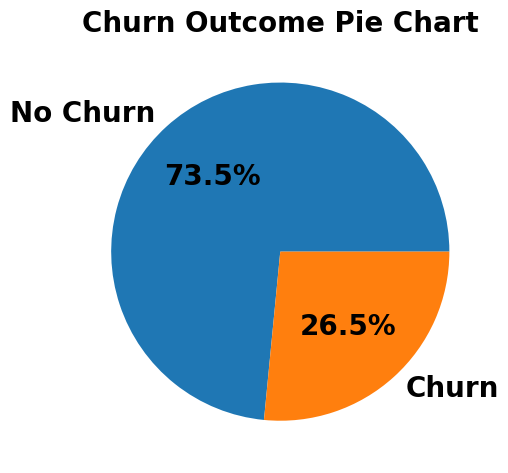

In [18]:
    fig = plt.figure(figsize = (12, 8))
    plt.subplot(121)
    plt.pie(df.Churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 20, fontweight = 'bold')

In [19]:
def plot_kde(df, feature):
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    ax = sns.kdeplot(df[df.Churn == 'No'][feature].dropna(), label = 'No Churn', lw = 2, legend = True)
    plt.legend = True
    ax1 = sns.kdeplot(df[df.Churn == 'Yes'][feature].dropna(), label = 'Churn', lw = 2, legend = True)
    if feature == 'tenure':
        plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()

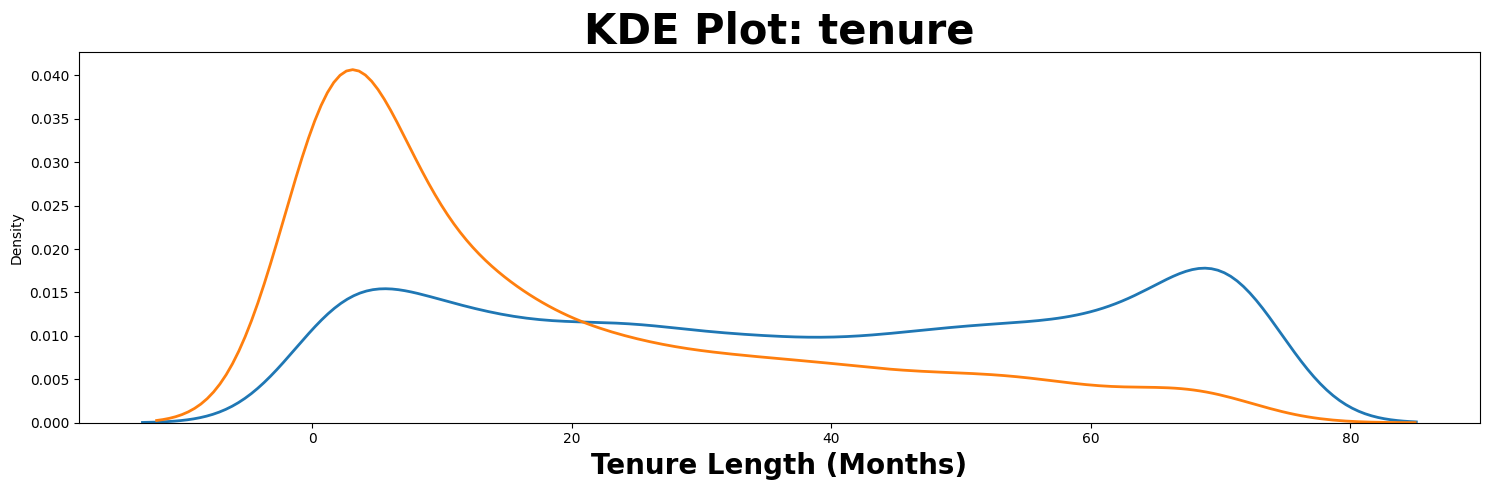

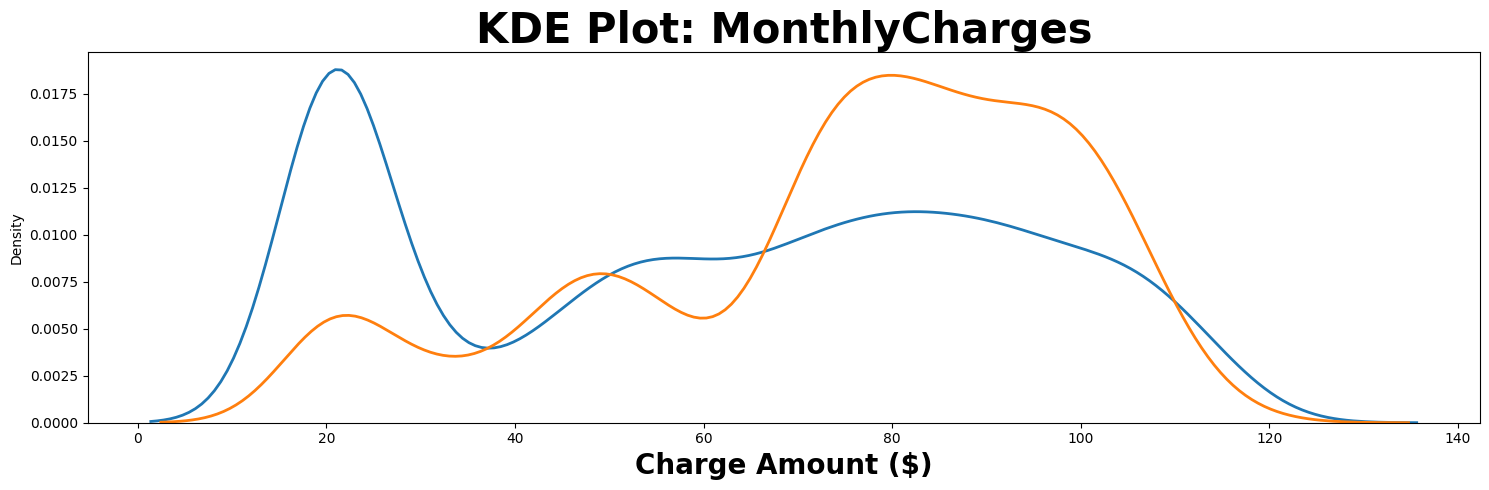

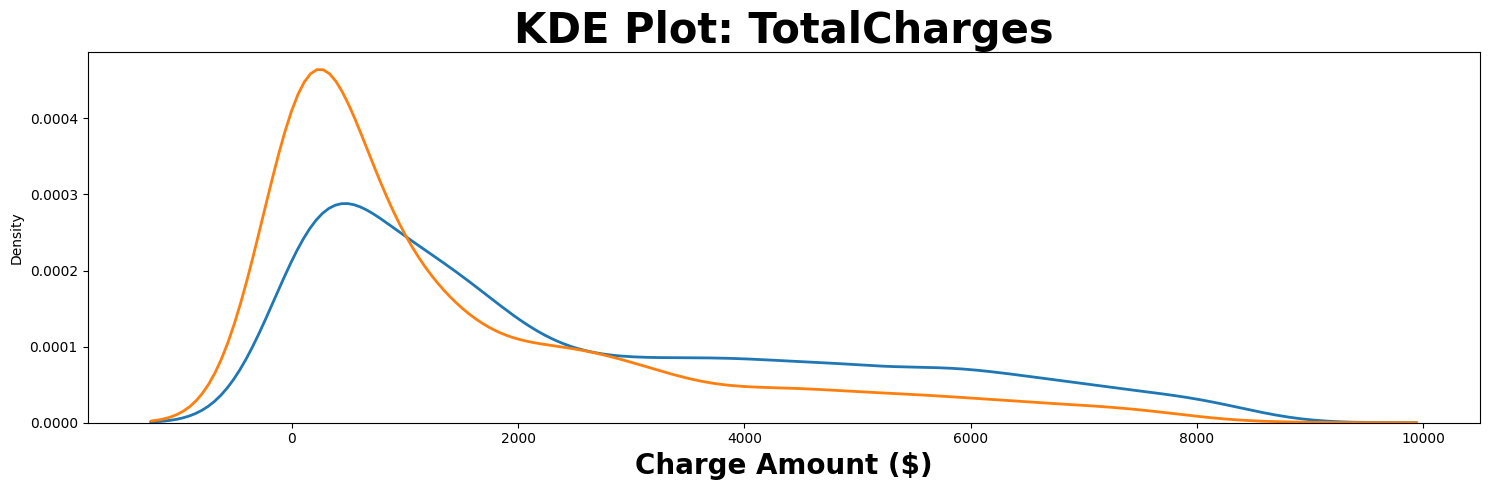

In [20]:
plot_kde(df, 'tenure')
plot_kde(df, 'MonthlyCharges')
plot_kde(df, 'TotalCharges')

### Feature distribution

We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

### Numerical features distribution


In [21]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

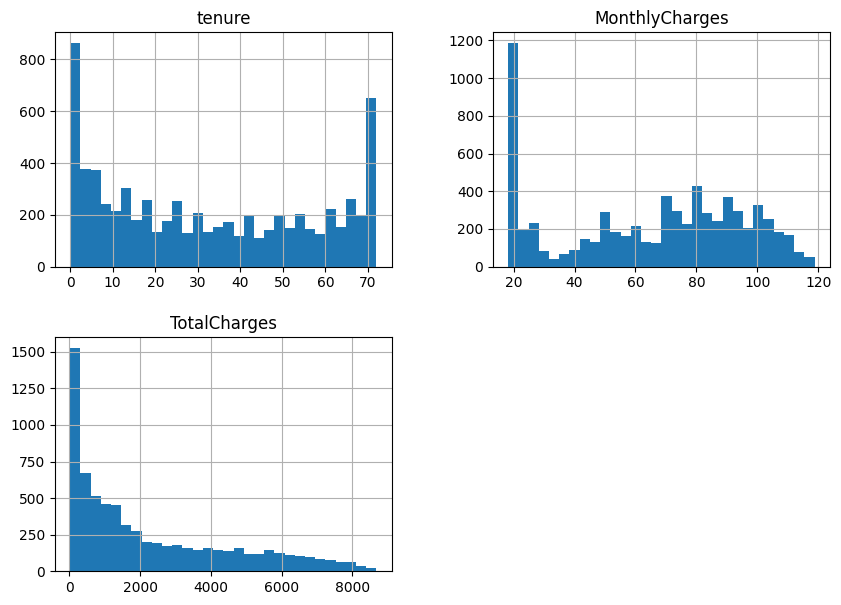

In [22]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

We look at distributions of numerical features in relation to the target variable. We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

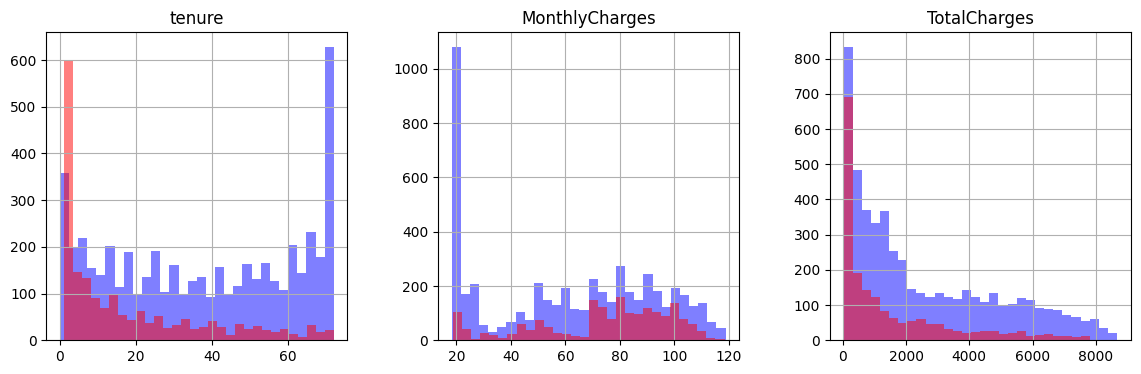

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

In [24]:
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [25]:
def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

In [26]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

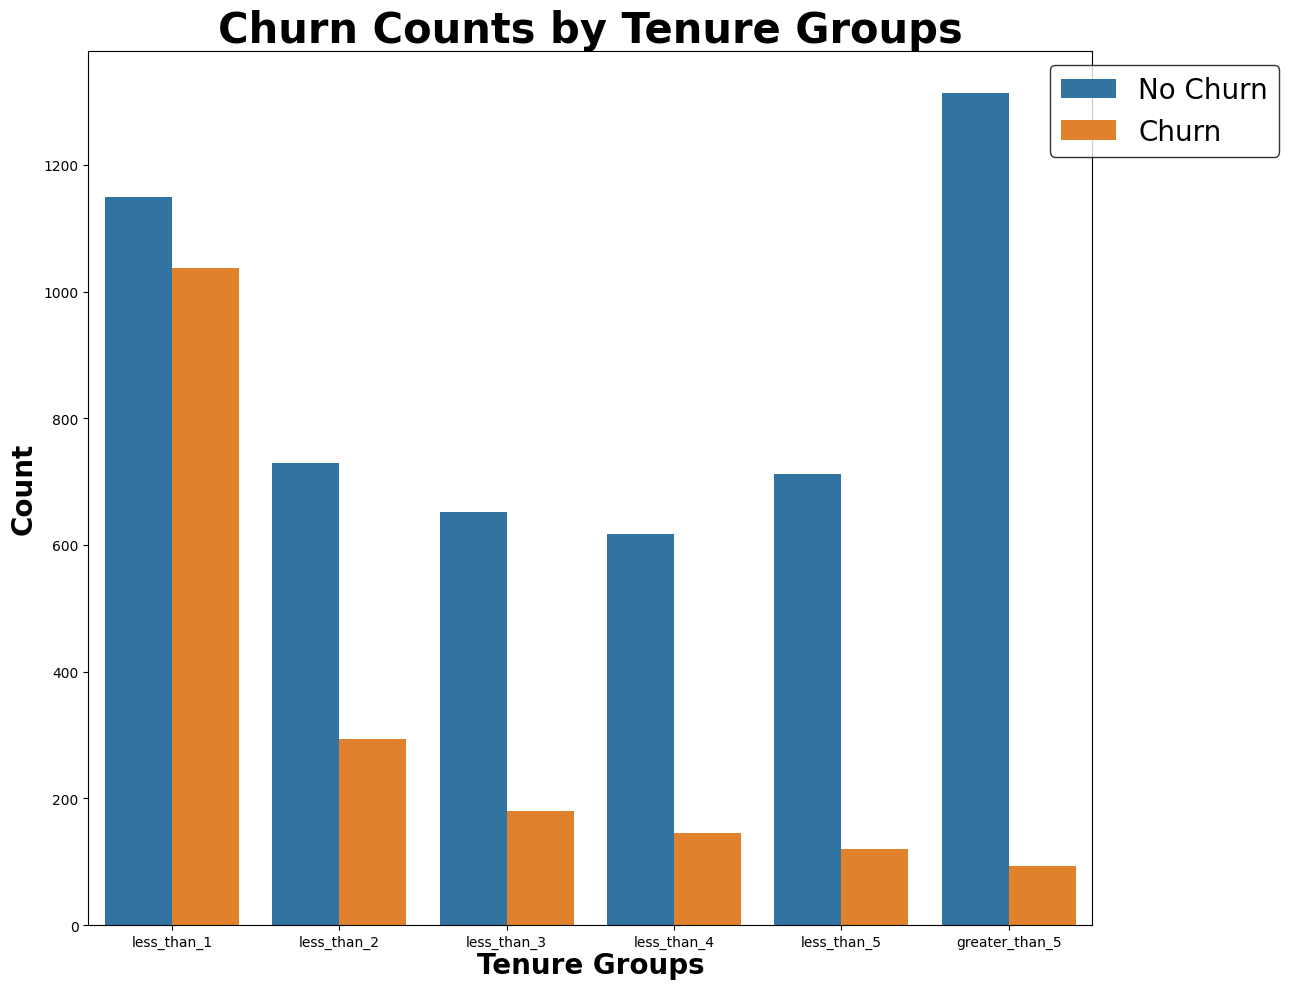

In [27]:
tenure_group_counts(df)

In [28]:
def plot_numerical_averages(df, feature):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'grouped_tenure', y = feature, hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    b.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    b.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()
    

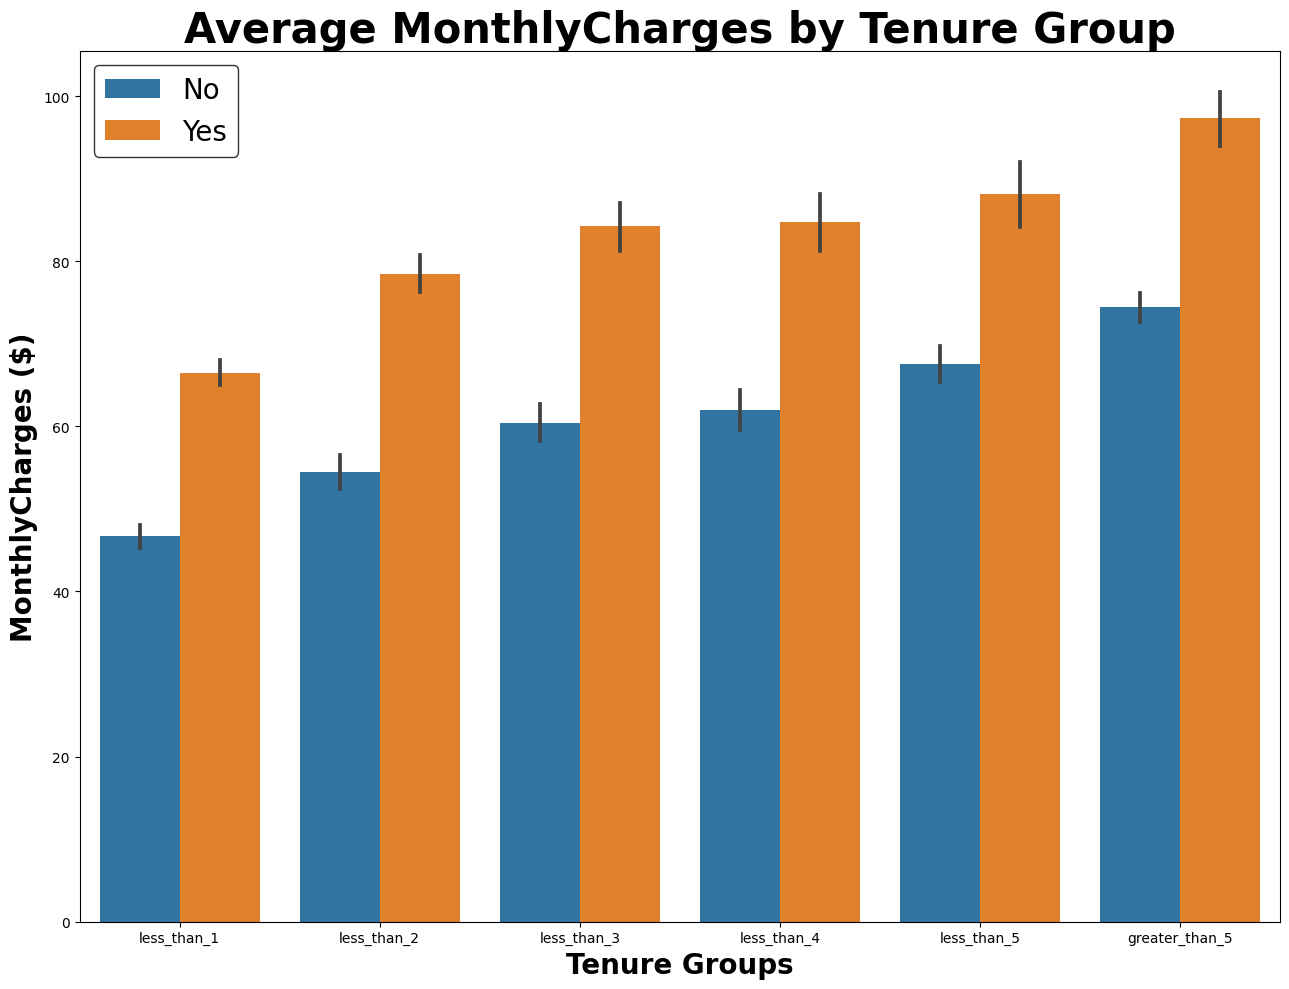

In [29]:
plot_numerical_averages(df, 'MonthlyCharges')

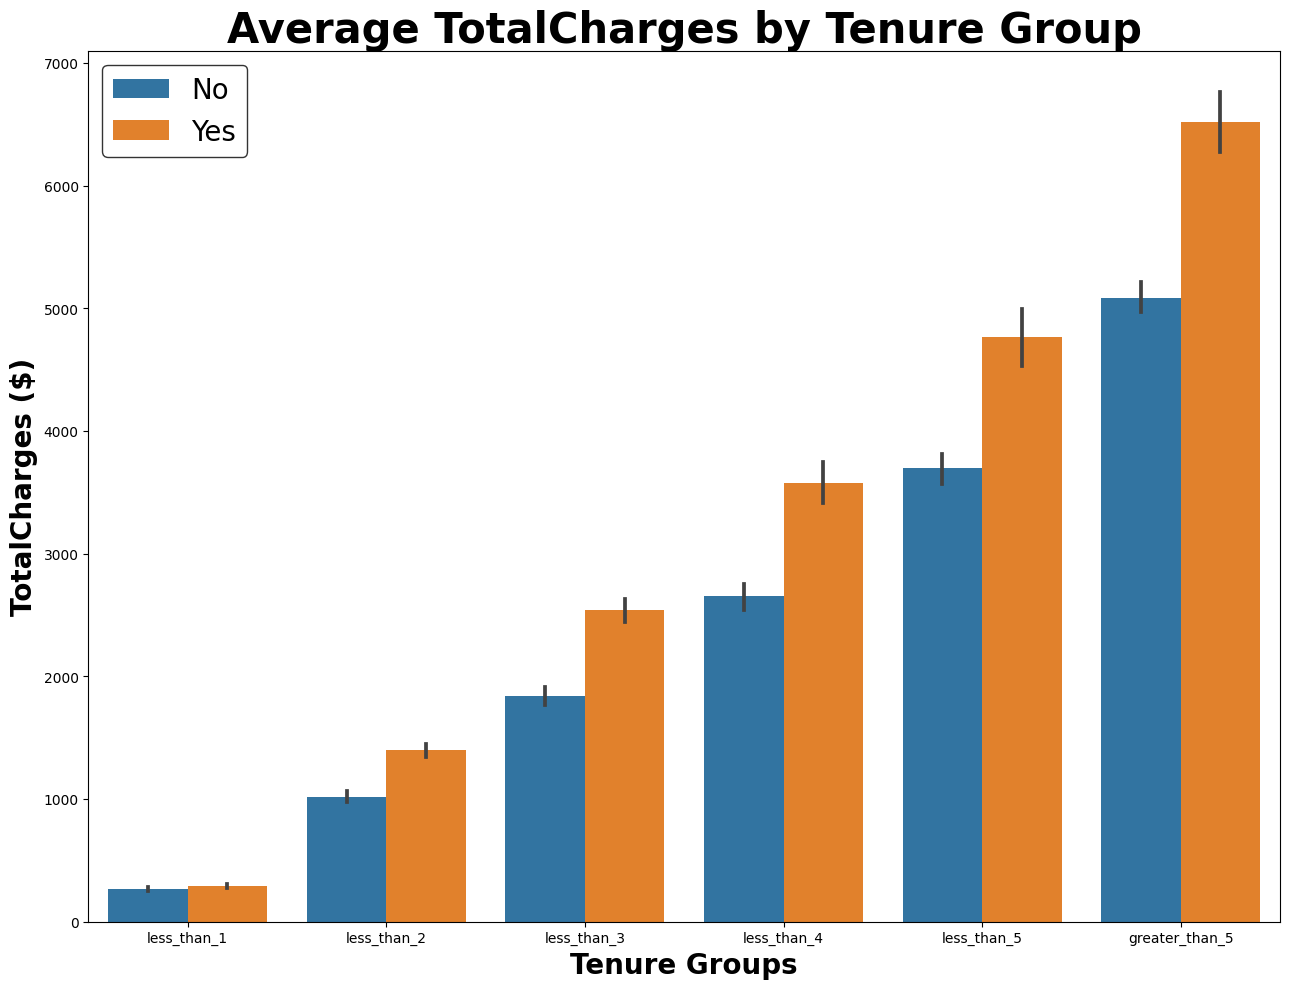

In [30]:
plot_numerical_averages(df, 'TotalCharges')

### Categorical feature distribution


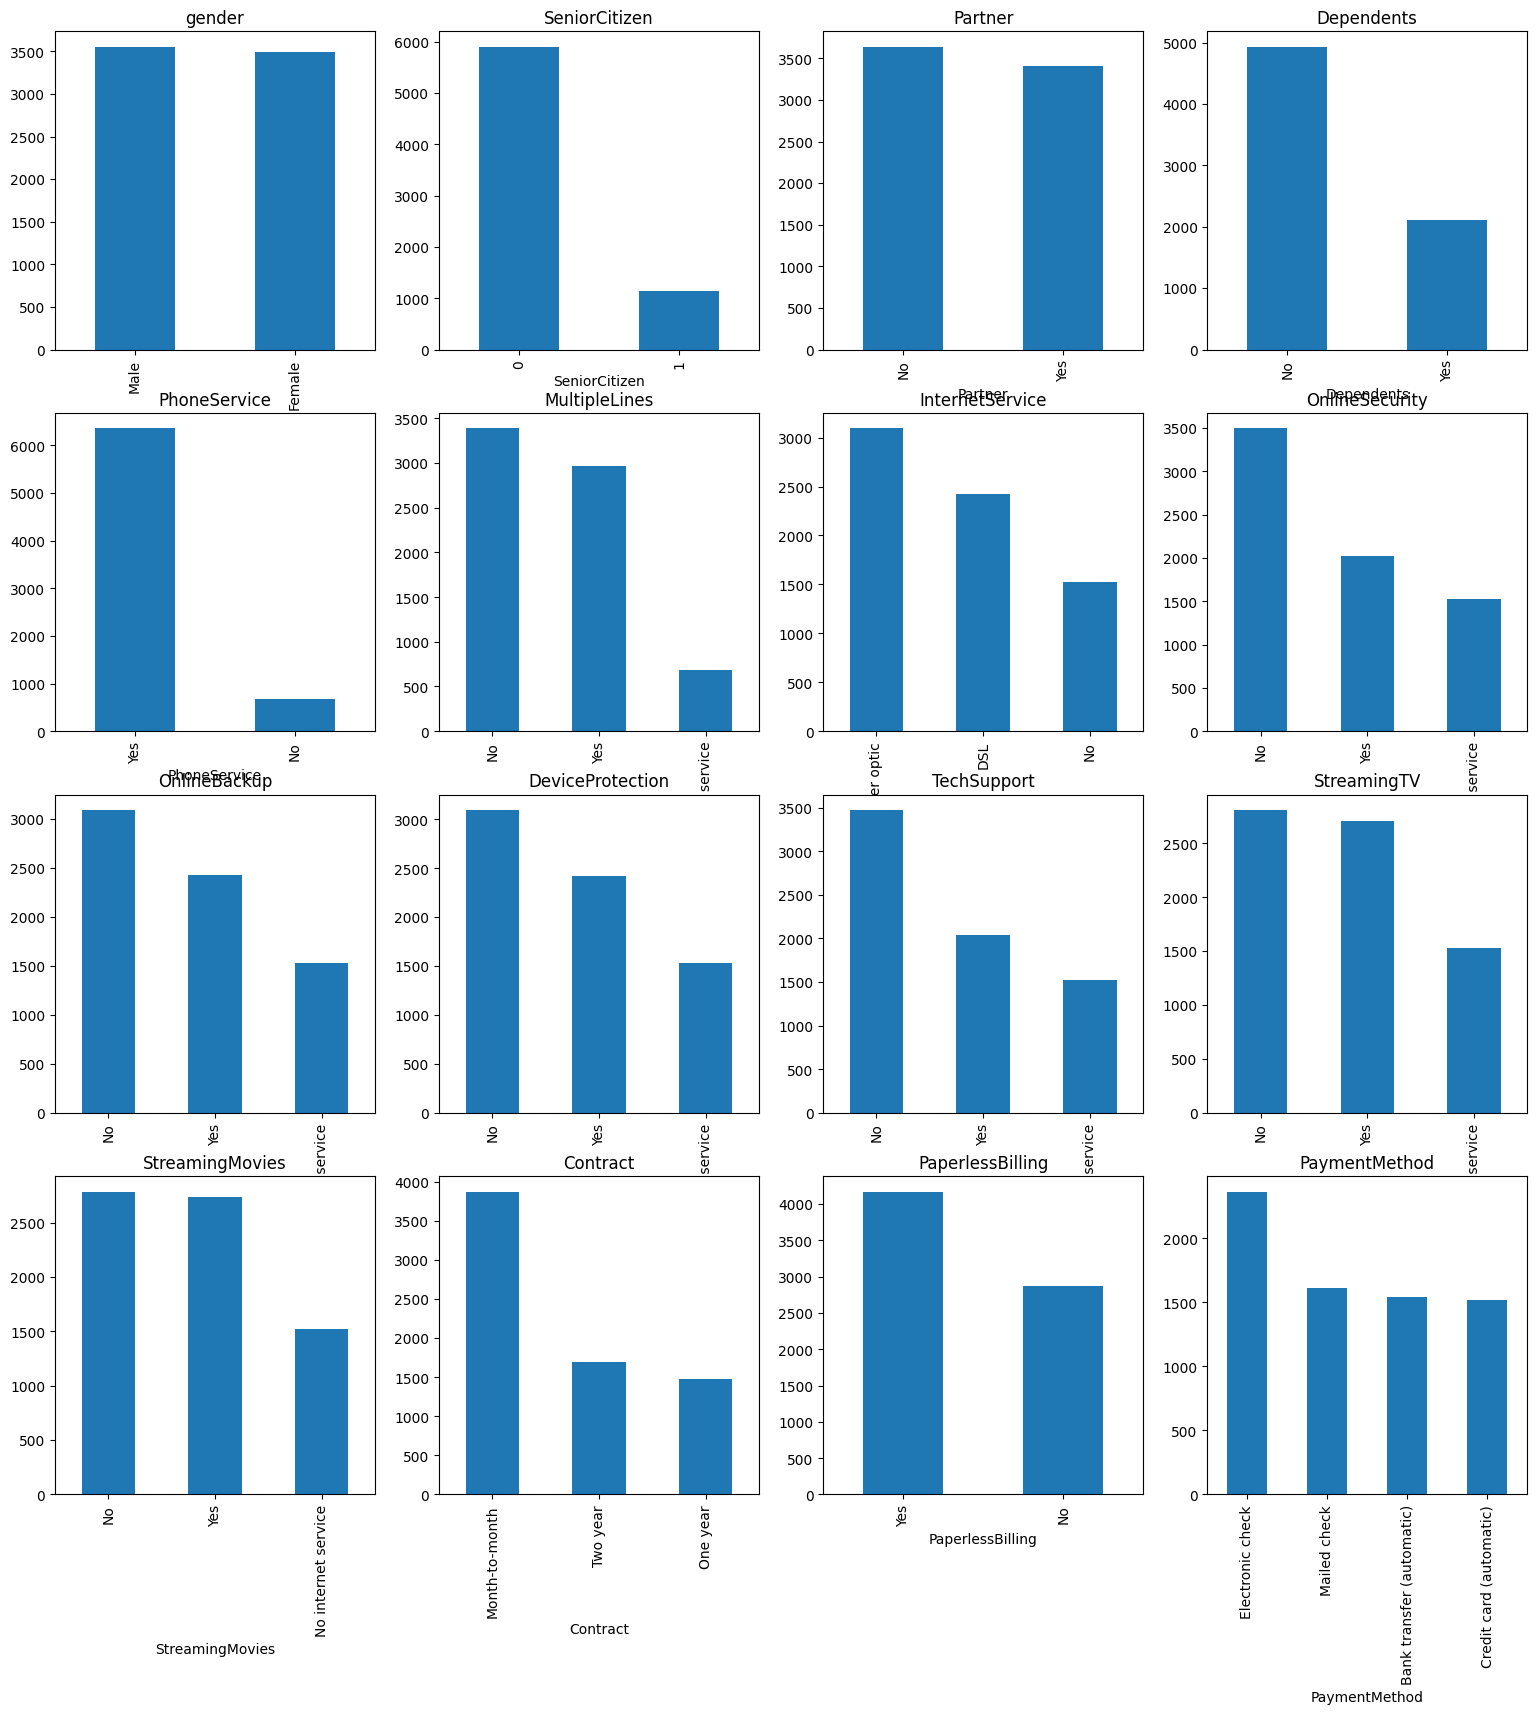

In [31]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

### Churn By GENDER


In [32]:
def plot_gender_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(df.gender.value_counts(), labels = ['Male', 'Female'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Overall Data Gender Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    a = sns.countplot(data = df, x = 'gender', hue = 'Churn')
    a.set_title('Gender Distribution by Churn', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Gender', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.tight_layout()

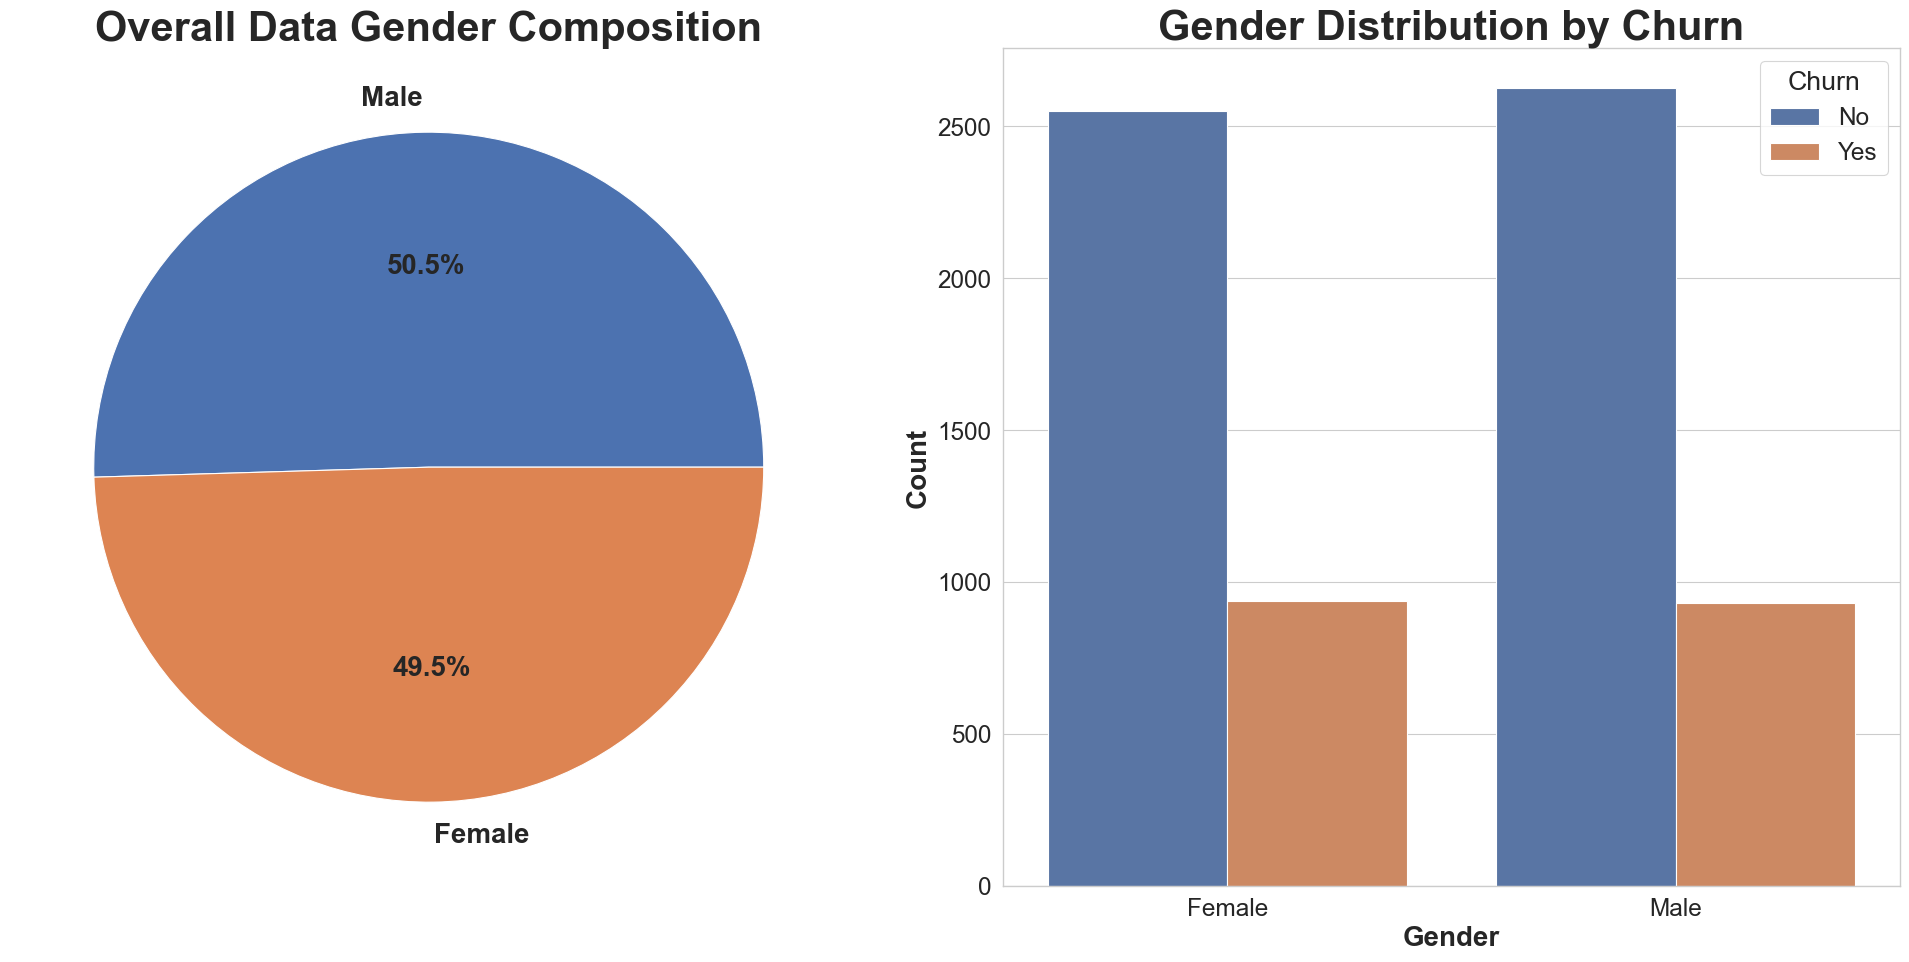

In [33]:
plot_gender_dist(df)

### Churn By AGE


In [34]:
def plot_age_dist(df):
    fig = plt.figure(figsize=(30, 10))
    
    plt.subplot(131)
    plt.pie(df.SeniorCitizen.value_counts(), labels=['Non-Senior Citizen', 'Senior'], autopct='%.1f%%', radius=1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Age Composition of Overall Data', fontweight='bold', fontsize=30)
    
    plt.subplot(132)
    g = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='counts')
    g['pct_total'] = (g['counts'] / len(df)) * 100
    t = sns.barplot(x='SeniorCitizen', y='pct_total', hue='Churn', data=g)
    t.set_title('Churn % by Age', fontsize=30, fontweight='bold')
    t.set_xlabel('')
    t.set_ylabel('Percentage of Customers', fontsize=20, fontweight='bold')
    t.set_xticklabels(labels=['Non-Senior Citizen', 'Senior Citizen'], fontweight='bold', fontsize=20)
    
    plt.subplot(133)
    x = sns.violinplot(x='SeniorCitizen', y='MonthlyCharges', hue='Churn', data=df, split=True)
    x.set_title('Violin Plot: Monthly Charges by Age', fontsize=30, fontweight='bold')
    x.set_xlabel('')
    x.set_ylabel('Monthly Charges ($)', fontsize=20, fontweight='bold')
    x.set_xticklabels(labels=['Non-Senior Citizen', 'Senior Citizen'], fontsize=20, fontweight='bold')
    
    plt.tight_layout()

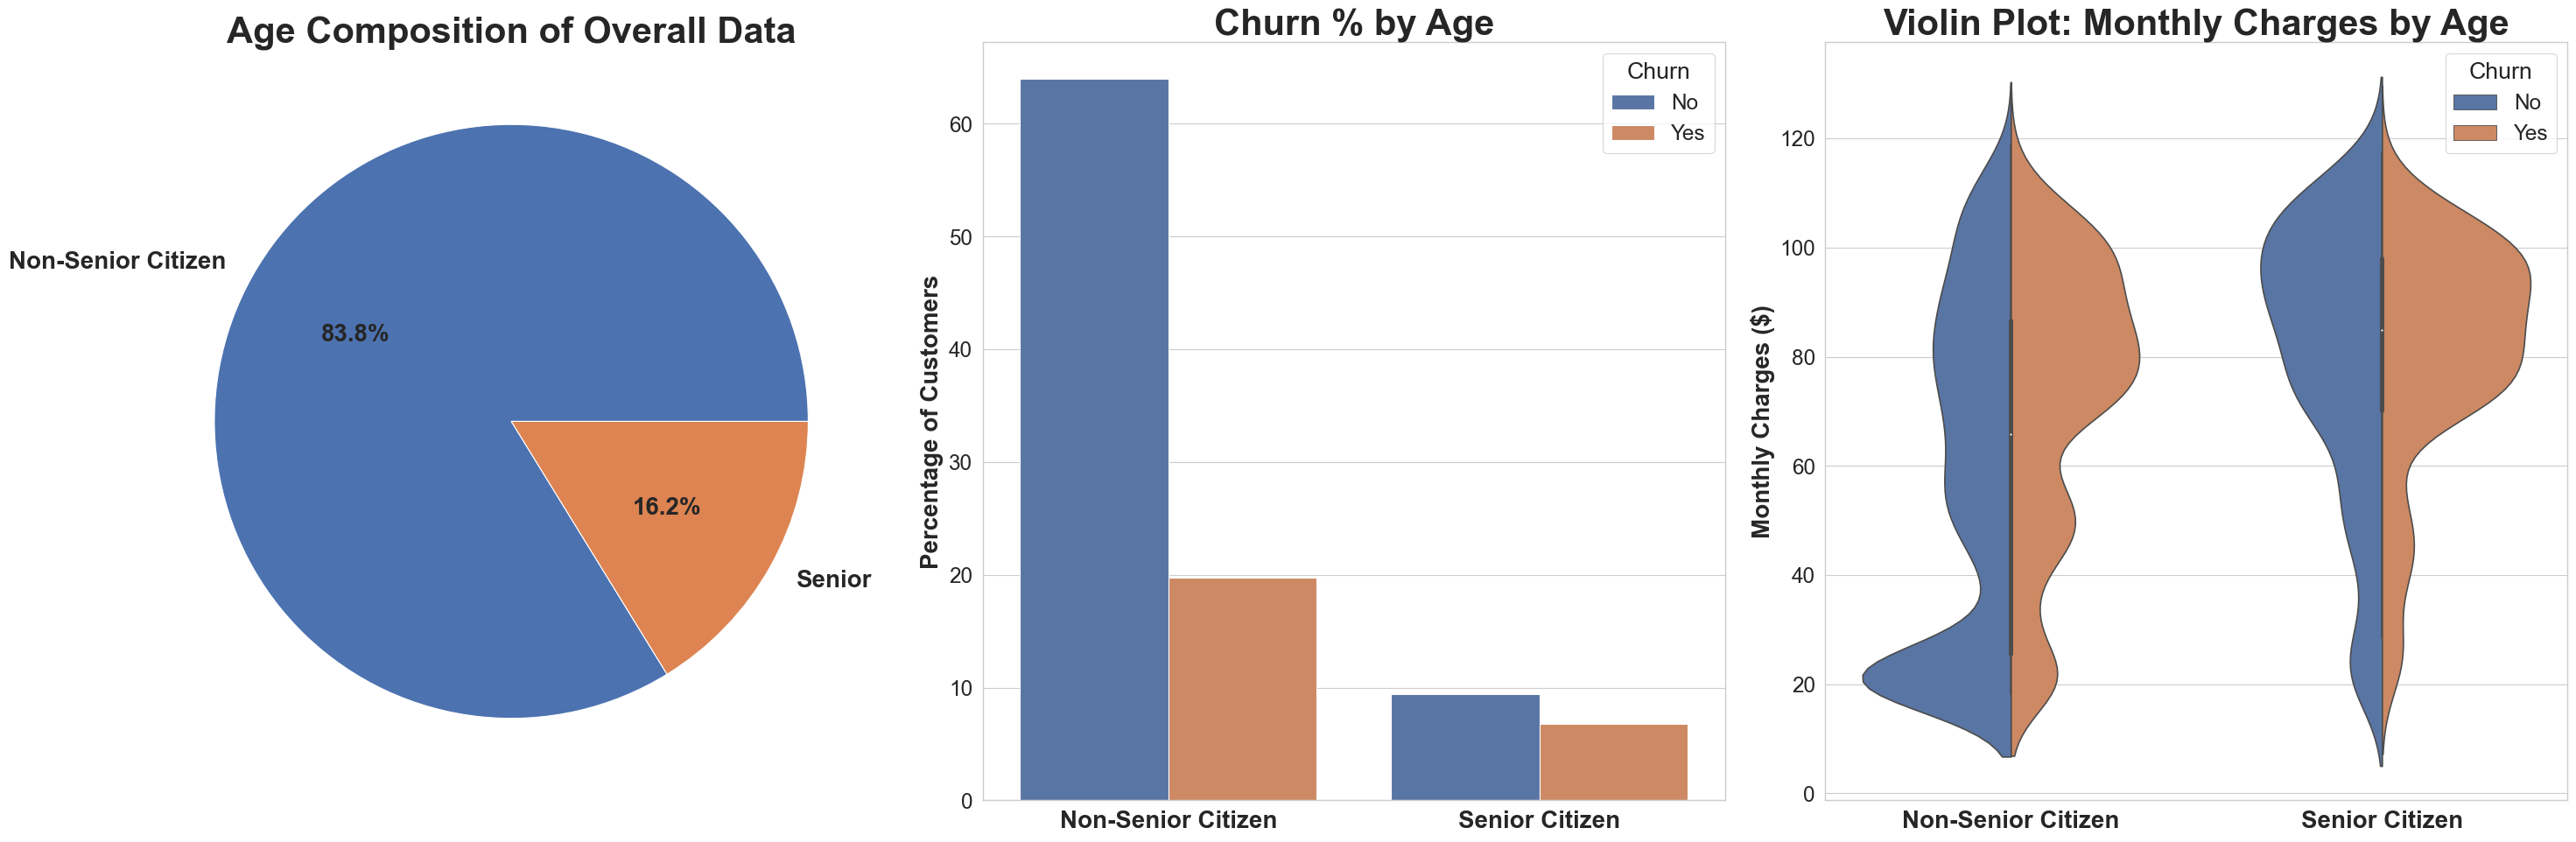

In [35]:
plot_age_dist(df)

### Churn By Partner and Dependents


In [36]:
def plot_partner_dependents(df):
    
    fig = plt.figure(figsize=(25, 25))
    
    plt.subplot(321)
    plt.pie(df.Partner.value_counts(), labels=['No Partner', 'Partner'], autopct='%.1f%%', radius=1, textprops={'fontsize': 20, 'fontweight': 'bold'}, startangle=90)
    plt.title('Partner Composition of Overall Data', fontweight='bold', fontsize=30)
    
    plt.subplot(322)
    plt.pie(df.Dependents.value_counts(), labels=['No Dependents', 'Dependents'], autopct='%.1f%%', radius=1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Dependent Composition of Overall Data', fontsize=30, fontweight='bold')
    
    plt.subplot(323)
    x = df.groupby(['Partner', 'Churn']).size().reset_index(name='counts')
    x['pct_total'] = (x['counts'] / len(df)) * 100
    u = sns.barplot(x='Partner', y='pct_total', hue='Churn', data=x)
    u.set_title('Churn % by Partner', fontweight='bold', fontsize=30)
    u.set(xticklabels=['No Partner', 'Partner'])
    u.set_xlabel('')
    u.set_ylabel('Percentage of Total', fontweight='bold', fontsize=20)
    
    plt.subplot(324)
    y = df.groupby(['Dependents', 'Churn']).size().reset_index(name='counts')
    y['pct_total'] = (y['counts'] / len(df)) * 100
    v = sns.barplot(x='Dependents', y='pct_total', hue='Churn', data=y)
    v.set_title('Churn % by Dependents', fontweight='bold', fontsize=30)
    v.set(xticklabels=['No Dependents', 'Dependents'])
    v.set_xlabel('')
    v.set_ylabel('')
    
    plt.subplot(325)
    y = sns.violinplot(x='Partner', y='MonthlyCharges', hue='Churn', data=df, split=True)
    y.set_title('Violin Plot: Monthly Charges by Partner', fontweight='bold', fontsize=30)
    y.set_xticklabels(['No Partner', 'Partner'])
    y.set_xlabel('')
    
    plt.subplot(326)
    z = sns.violinplot(x='Dependents', y='MonthlyCharges', hue='Churn', data=df, split=True)
    z.set_title('Violin Plot: Monthly Charges by Dependents', fontweight='bold', fontsize=30)
    z.set_xticklabels(['No Dependents', 'Dependents'])
    z.set_xlabel('')
    z.set_ylabel('Monthly Charges', fontweight='bold', fontsize=20)
    
    plt.tight_layout()

In [37]:
df[df.Churn == 'Yes'].Partner.value_counts()

Partner
No     1200
Yes     669
Name: count, dtype: int64

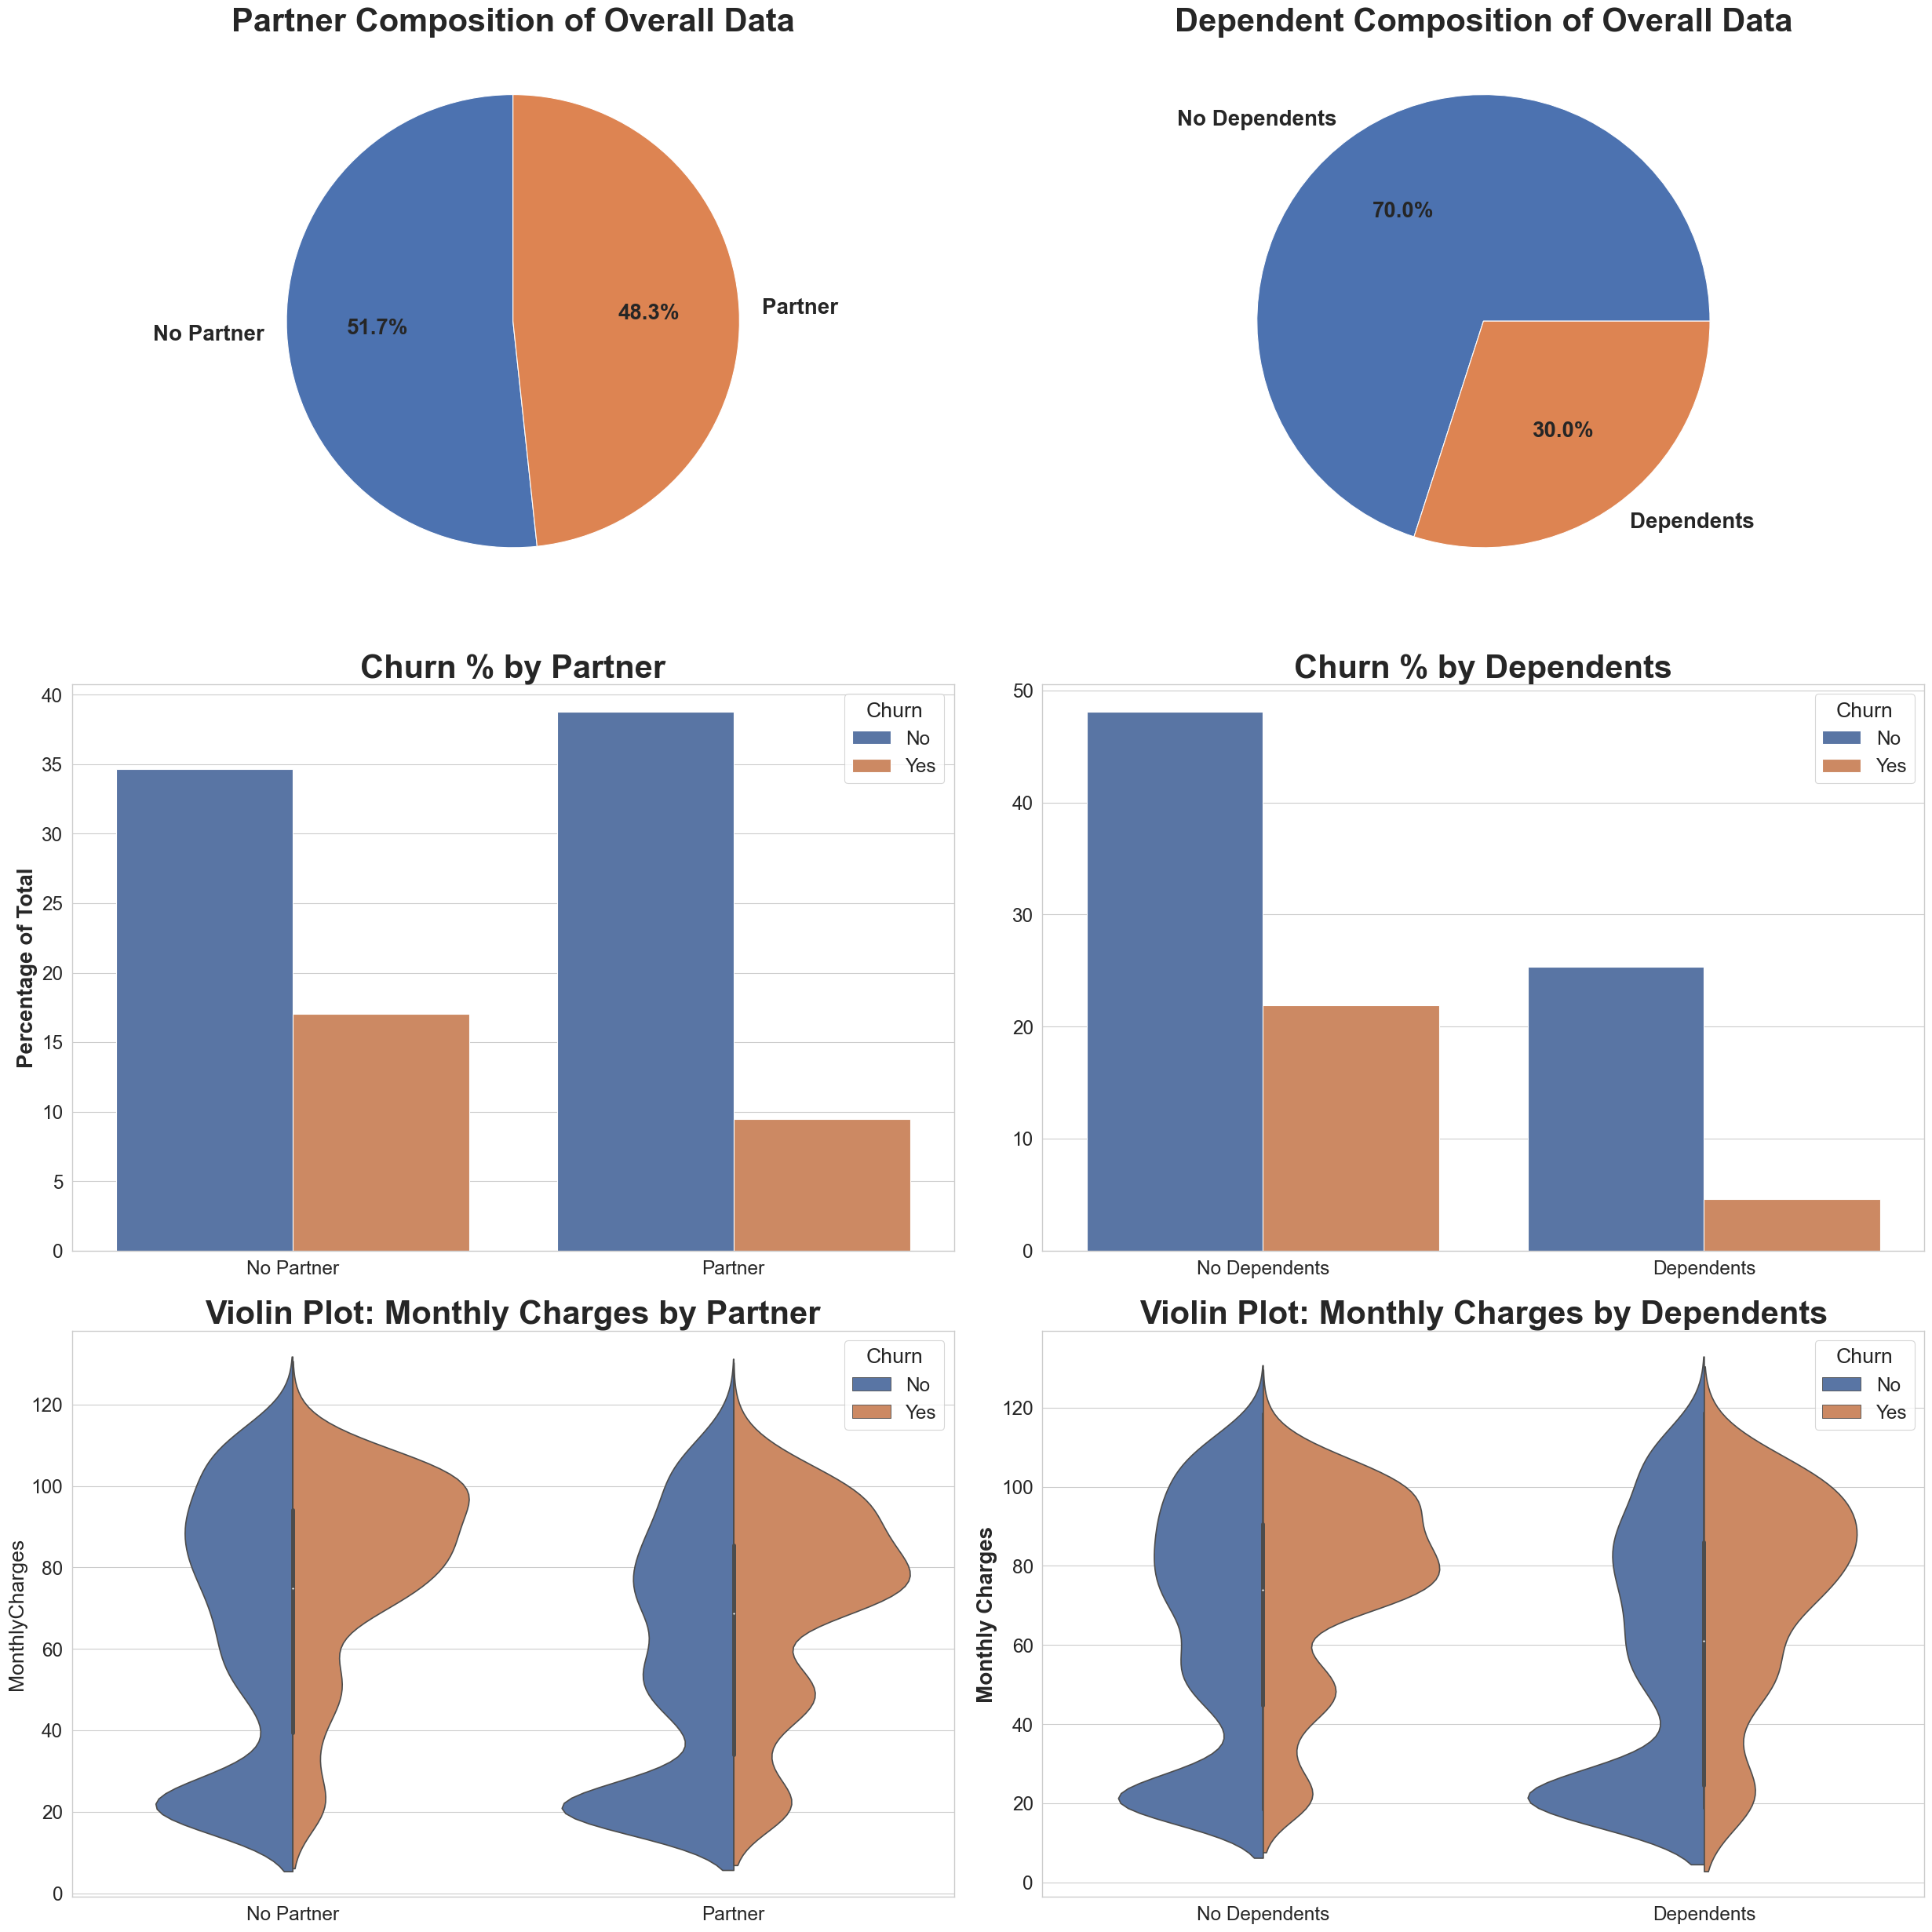

In [38]:
plot_partner_dependents(df)

### Churn By Phone Services & Multiple Lines


In [39]:
def plot_services(df):
    phone_only = df[(df.PhoneService == 'Yes') & (df.InternetService == 'No')]
    
    fig = plt.figure(figsize=(30, 20))

    plt.subplot(231)
    plt.pie(phone_only.Churn.value_counts(), labels=['No Churn', 'Churn'], autopct='%.1f%%', radius=1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Customer Churn - Phone Service Only', fontsize=30, fontweight='bold')
    
    plt.subplot(232)
    z = df.groupby(['PhoneService', 'Churn']).size().reset_index(name='counts')
    z['pct_total'] = (z['counts'] / len(df)) * 100
    a = sns.barplot(x='PhoneService', y='pct_total', hue='Churn', data=z)
    a.set_title('% Churn by Phone Service', fontsize=30, fontweight='bold')
    a.set(xticklabels=['No Phone', 'Phone'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight='bold')
    
    plt.subplot(233)
    v1 = sns.violinplot(x='PhoneService', y='MonthlyCharges', hue='Churn', data=df, split=True)
    v1.set_title('Violin Plot: Monthly Charges by Phone Service', fontsize=30, fontweight='bold')
    v1.set_xlabel('')
    v1.set_ylabel('Monthly Charges ($)', fontsize=20, fontweight='bold')
    v1.set(xticklabels=['No Phone', 'Phone'])
    
    plt.subplot(234)
    plt.pie(df.MultipleLines.value_counts(), labels=['Singular Line', 'Multiple Lines', 'No Phone Service'], autopct='%.1f%%', radius=1, textprops={'fontweight': 'bold', 'fontsize': 20}, startangle=180)
    plt.title('Customer Composition by Line Quantity', fontsize=30, fontweight='bold')
    
    plt.subplot(235)
    bb = df.groupby(['MultipleLines', 'Churn']).size().reset_index(name='counts')
    bb['pct_total'] = (bb['counts'] / len(df)) * 100
    c = sns.barplot(x='MultipleLines', y='pct_total', hue='Churn', data=bb)
    c.set(xticklabels=['Singular Line', 'No Phone Service', 'Multiple Lines'])
    c.set_title('% Churn by Phone Line Qty.', fontsize=30, fontweight='bold')
    c.set_xlabel('')
    c.set_ylabel('% of Customers', fontweight='bold', fontsize=20)
    
    plt.subplot(236)
    v = sns.violinplot(x='MultipleLines', y='MonthlyCharges', hue='Churn', data=df, split=True)
    v.set_title('Violin Plot: Monthly Charges by Line Quantity', fontweight='bold', fontsize=30)
    v.set_xlabel('')
    v.set_ylabel('Monthly Charges ($)', fontweight='bold')
    v.set(xticklabels=['No Phone Service', 'Singular Line', 'Multiple Lines'])
    
    fig.suptitle('Phone Services - Line Quantity', fontweight='bold', fontsize=40)
    plt.tight_layout()

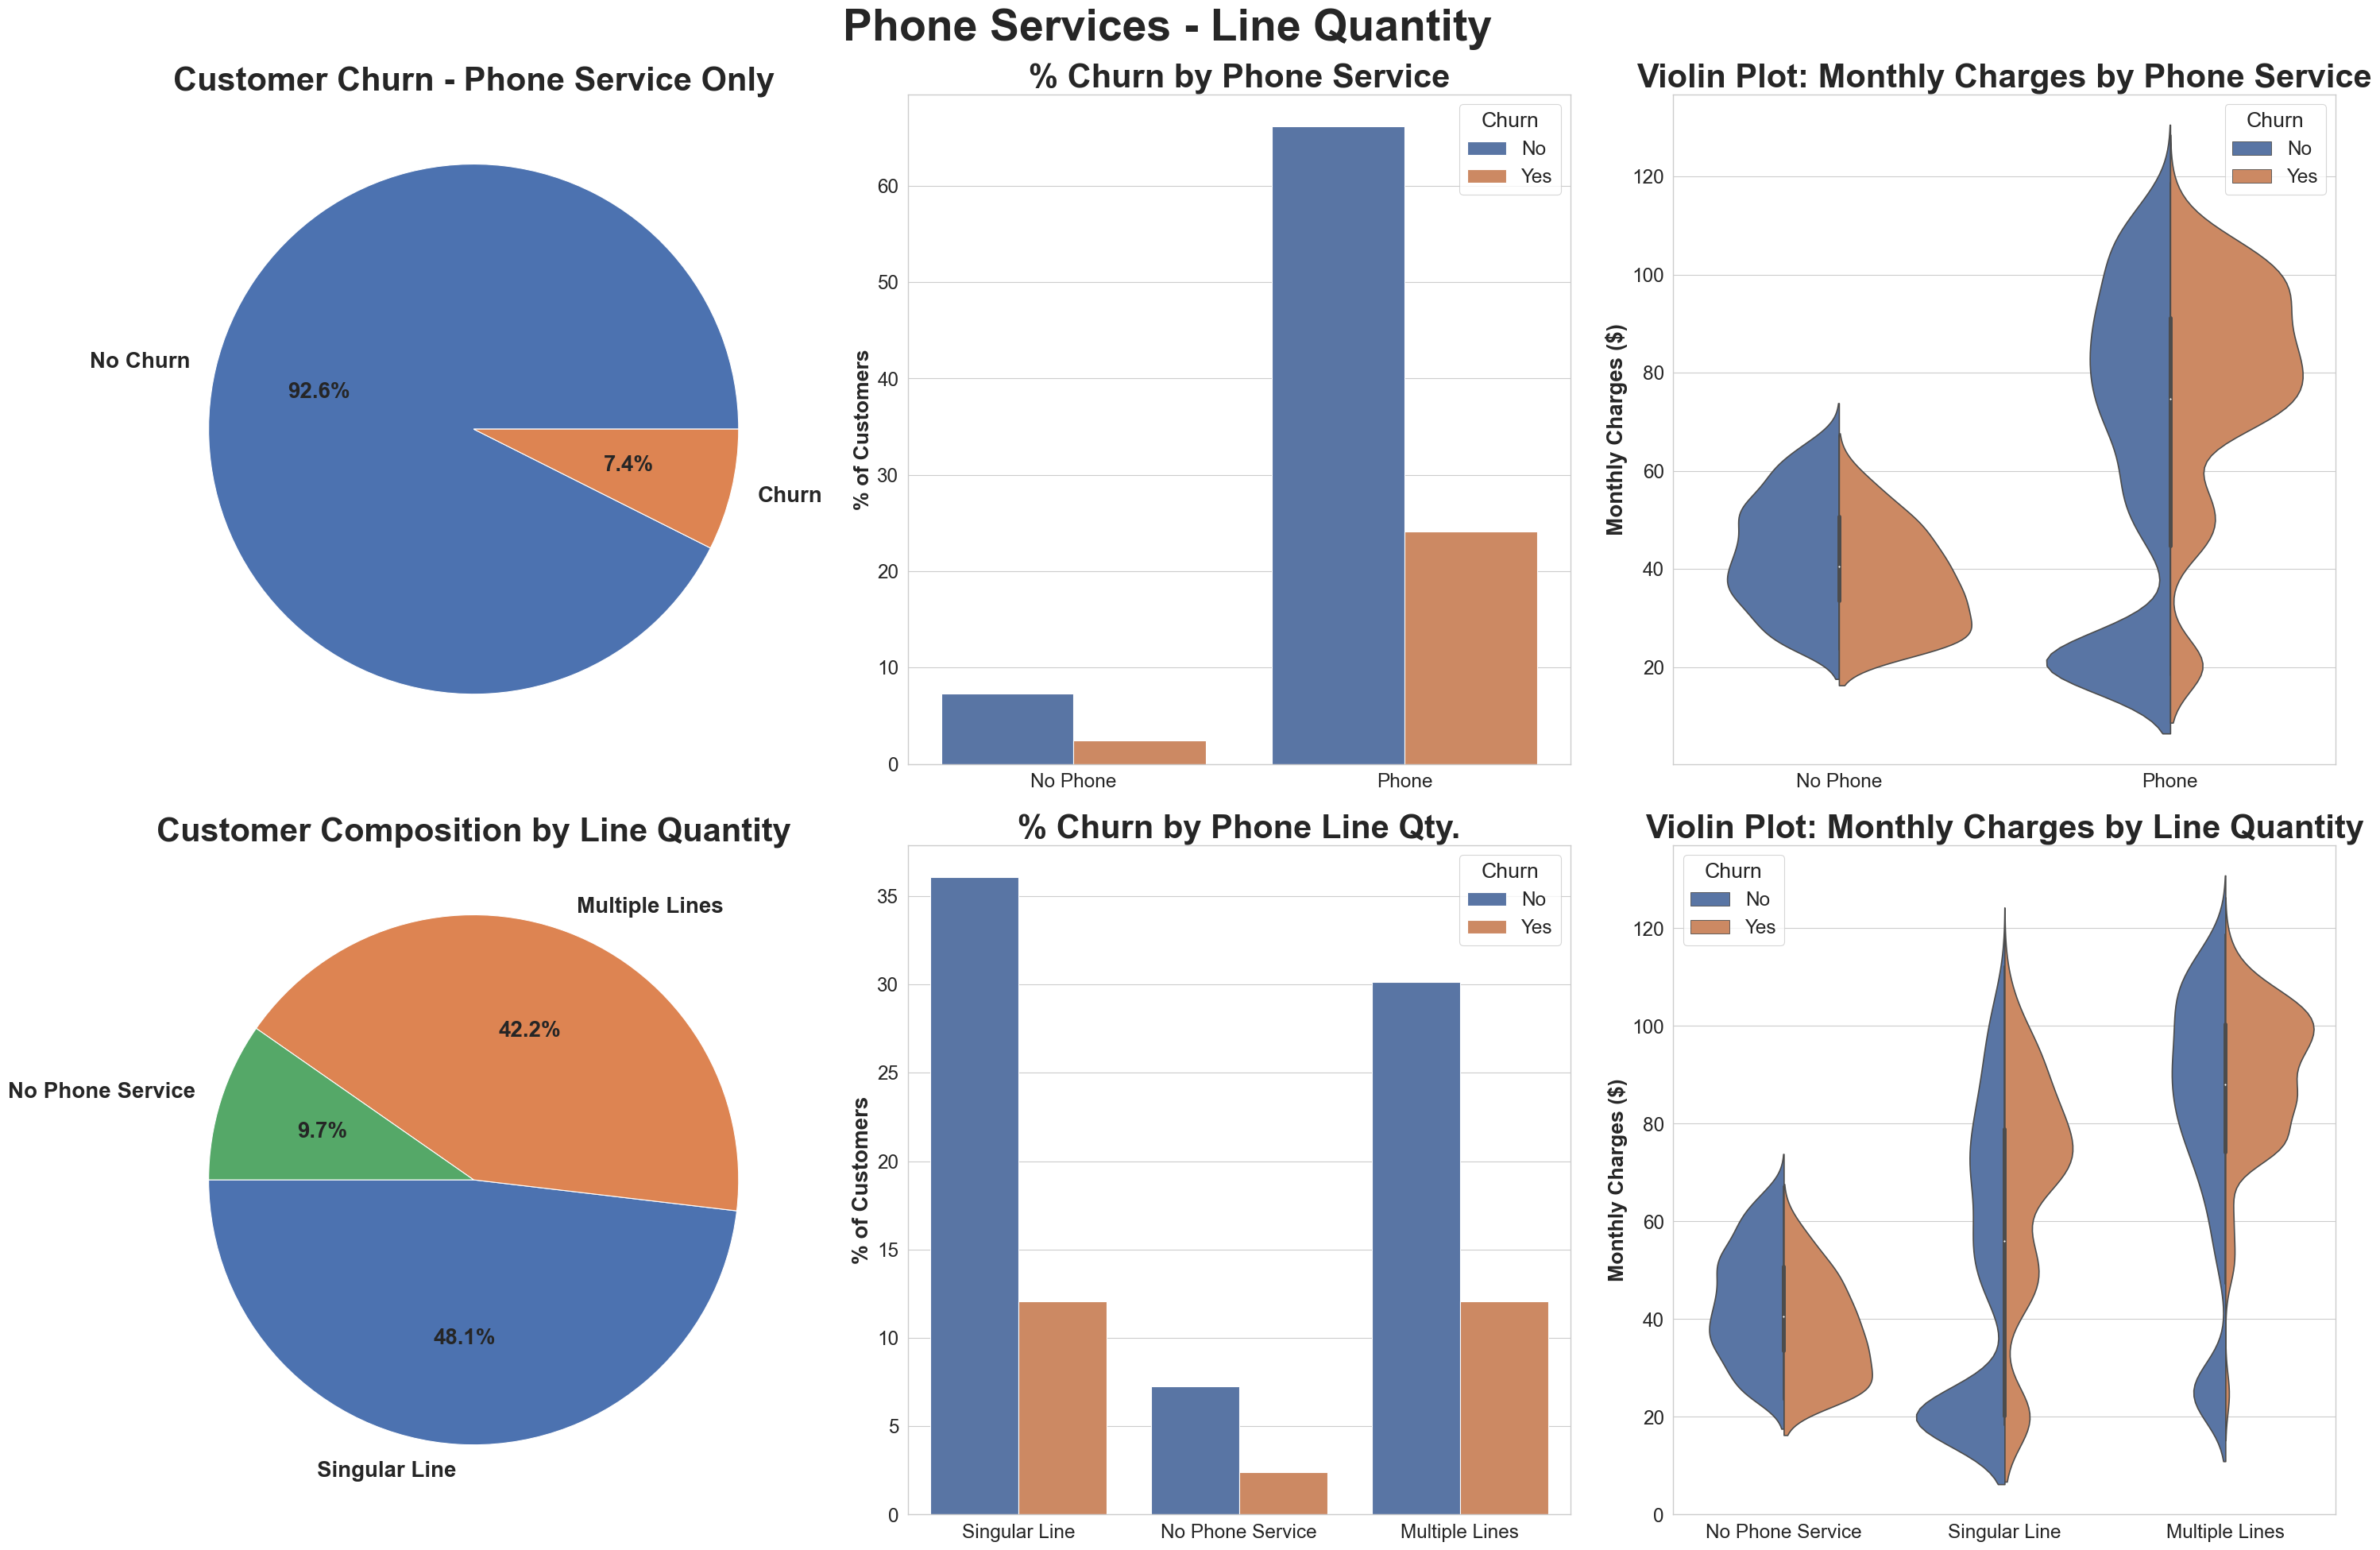

In [40]:
plot_services(df)

### Churn By Internet Services 


In [41]:
def plot_internet_services(df):
    copy = df.copy()
    fig = plt.figure(figsize=(30, 10))

    plt.subplot(131)
    plt.pie(copy.InternetService.value_counts(), labels=['Fiber Optic', 'DSL', 'No Internet'], autopct='%.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold'}, startangle=180)
    plt.title('Internet Service Composition of Customers', fontweight='bold', fontsize=30)
    
    plt.subplot(132)
    copy = copy.groupby(['InternetService', 'Churn']).size().reset_index(name='counts')
    copy['pct_total'] = (copy['counts'] / len(df)) * 100
    d = sns.barplot(x='InternetService', y='pct_total', hue='Churn', data=copy)
    d.set_title('% Churn by Internet Service', fontweight='bold', fontsize=30)
    d.set_xlabel('')
    d.set_ylabel('% of Customers', fontweight='bold', fontsize=20)
    d.set(xticklabels=['DSL', 'Fiber Optic', 'No Internet Service'])
    
    plt.subplot(133)
    e = sns.violinplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=df, split=True)
    e.set_title('Violin Plot: Monthly Charges by Internet Service', fontweight='bold', fontsize=30)
    e.set_xlabel('')
    e.set(xticklabels=['DSL', 'Fiber Optic', 'No Internet Service'])
    e.set_ylabel('Monthly Charges ($)', fontweight='bold', fontsize=30)

    fig.tight_layout()

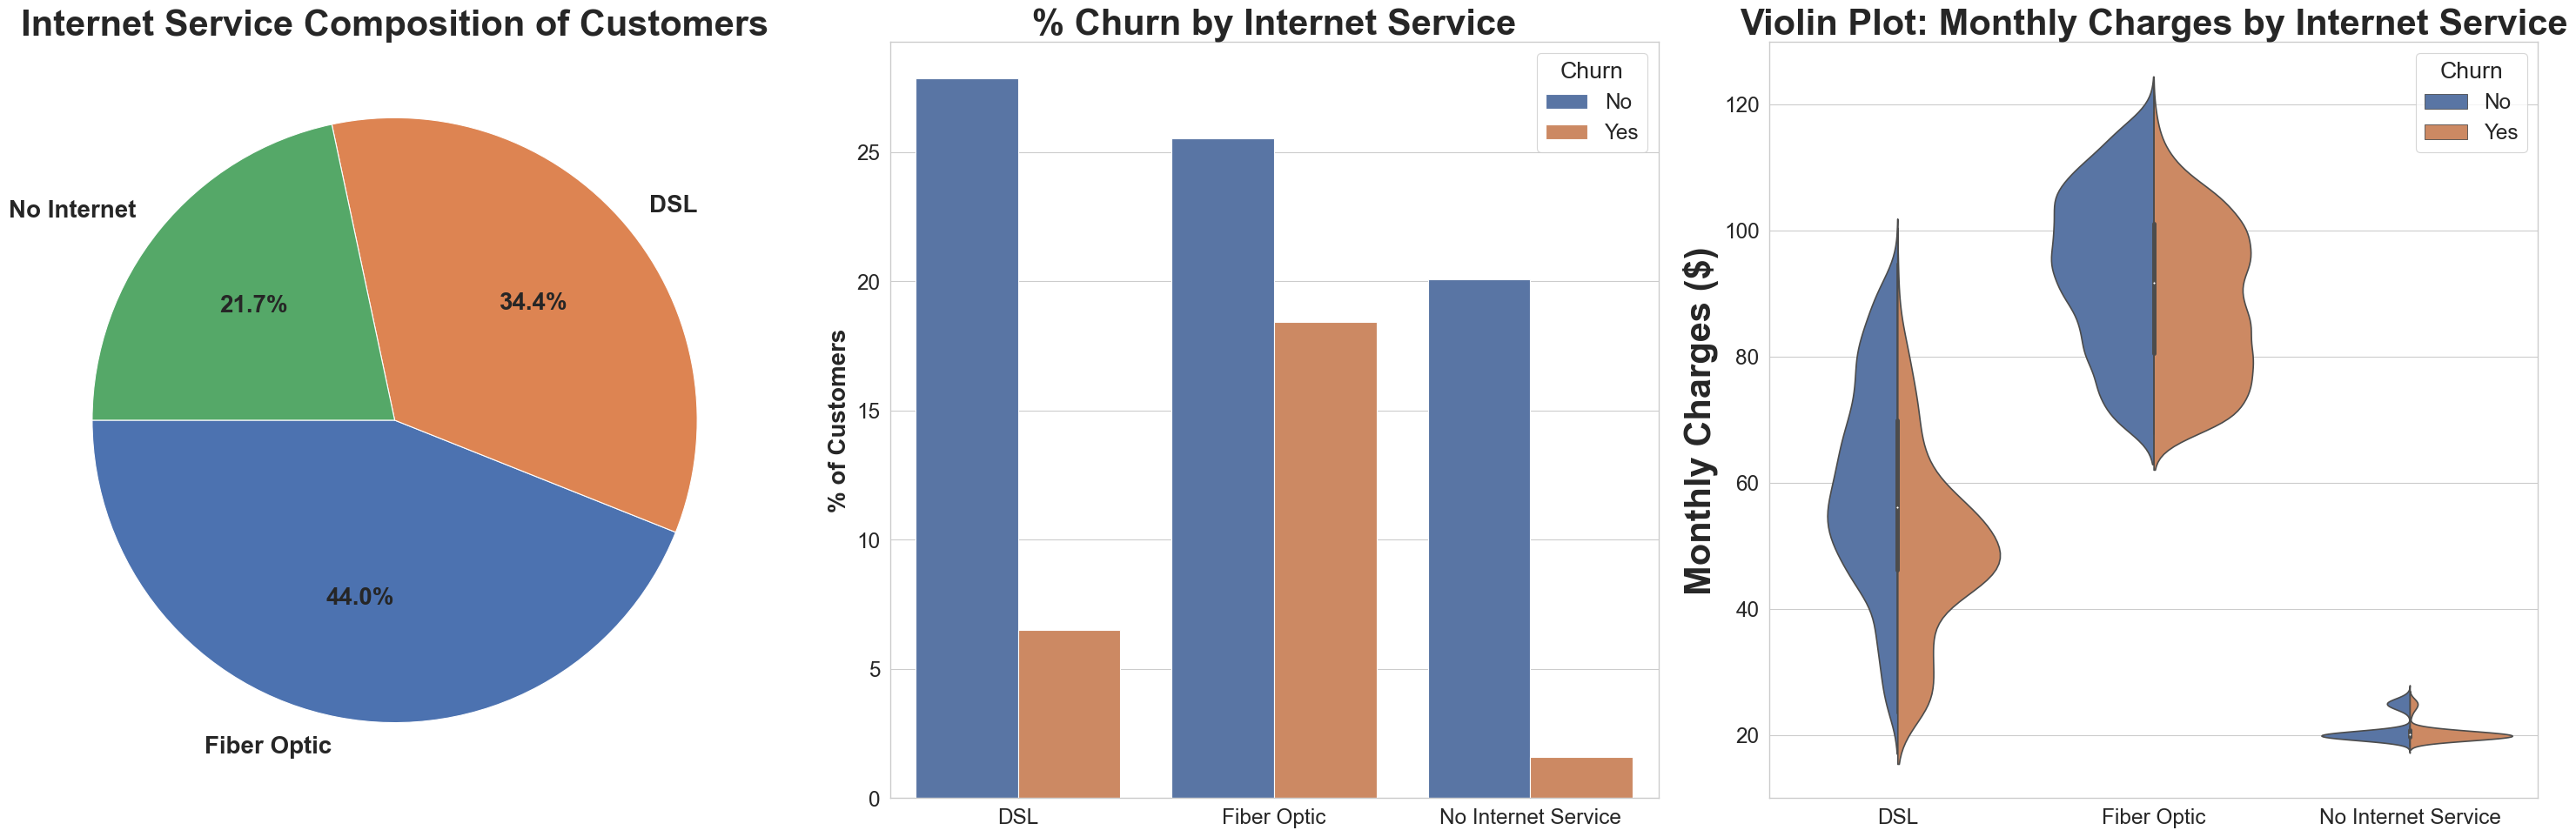

In [42]:
plot_internet_services(df)

### Churn By All Other Services


In [43]:
def plot_services(df):
    copy = df[df.InternetService != 'No']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(2, 6, 1)
    plt.pie(copy.OnlineSecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(2, 6, 2)
    plt.pie(copy.OnlineBackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(2, 6, 3)
    plt.pie(copy.DeviceProtection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(2, 6, 4)
    plt.pie(copy.TechSupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(2, 6, 5)
    plt.pie(copy.StreamingTV.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(2, 6, 6)
    plt.pie(copy.StreamingMovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(2, 6, 7)
    copy1 = copy[copy.OnlineSecurity == 'Yes']
    plt.pie(copy1.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2, 6, 8)
    copy2 = copy[copy.OnlineBackup == 'Yes']
    plt.pie(copy2.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2, 6, 9)
    copy3 = copy[copy.DeviceProtection == 'Yes']
    plt.pie(copy3.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.TechSupport == 'Yes']
    plt.pie(copy4.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.StreamingTV == 'Yes']
    plt.pie(copy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.StreamingMovies == 'Yes']
    plt.pie(copy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()

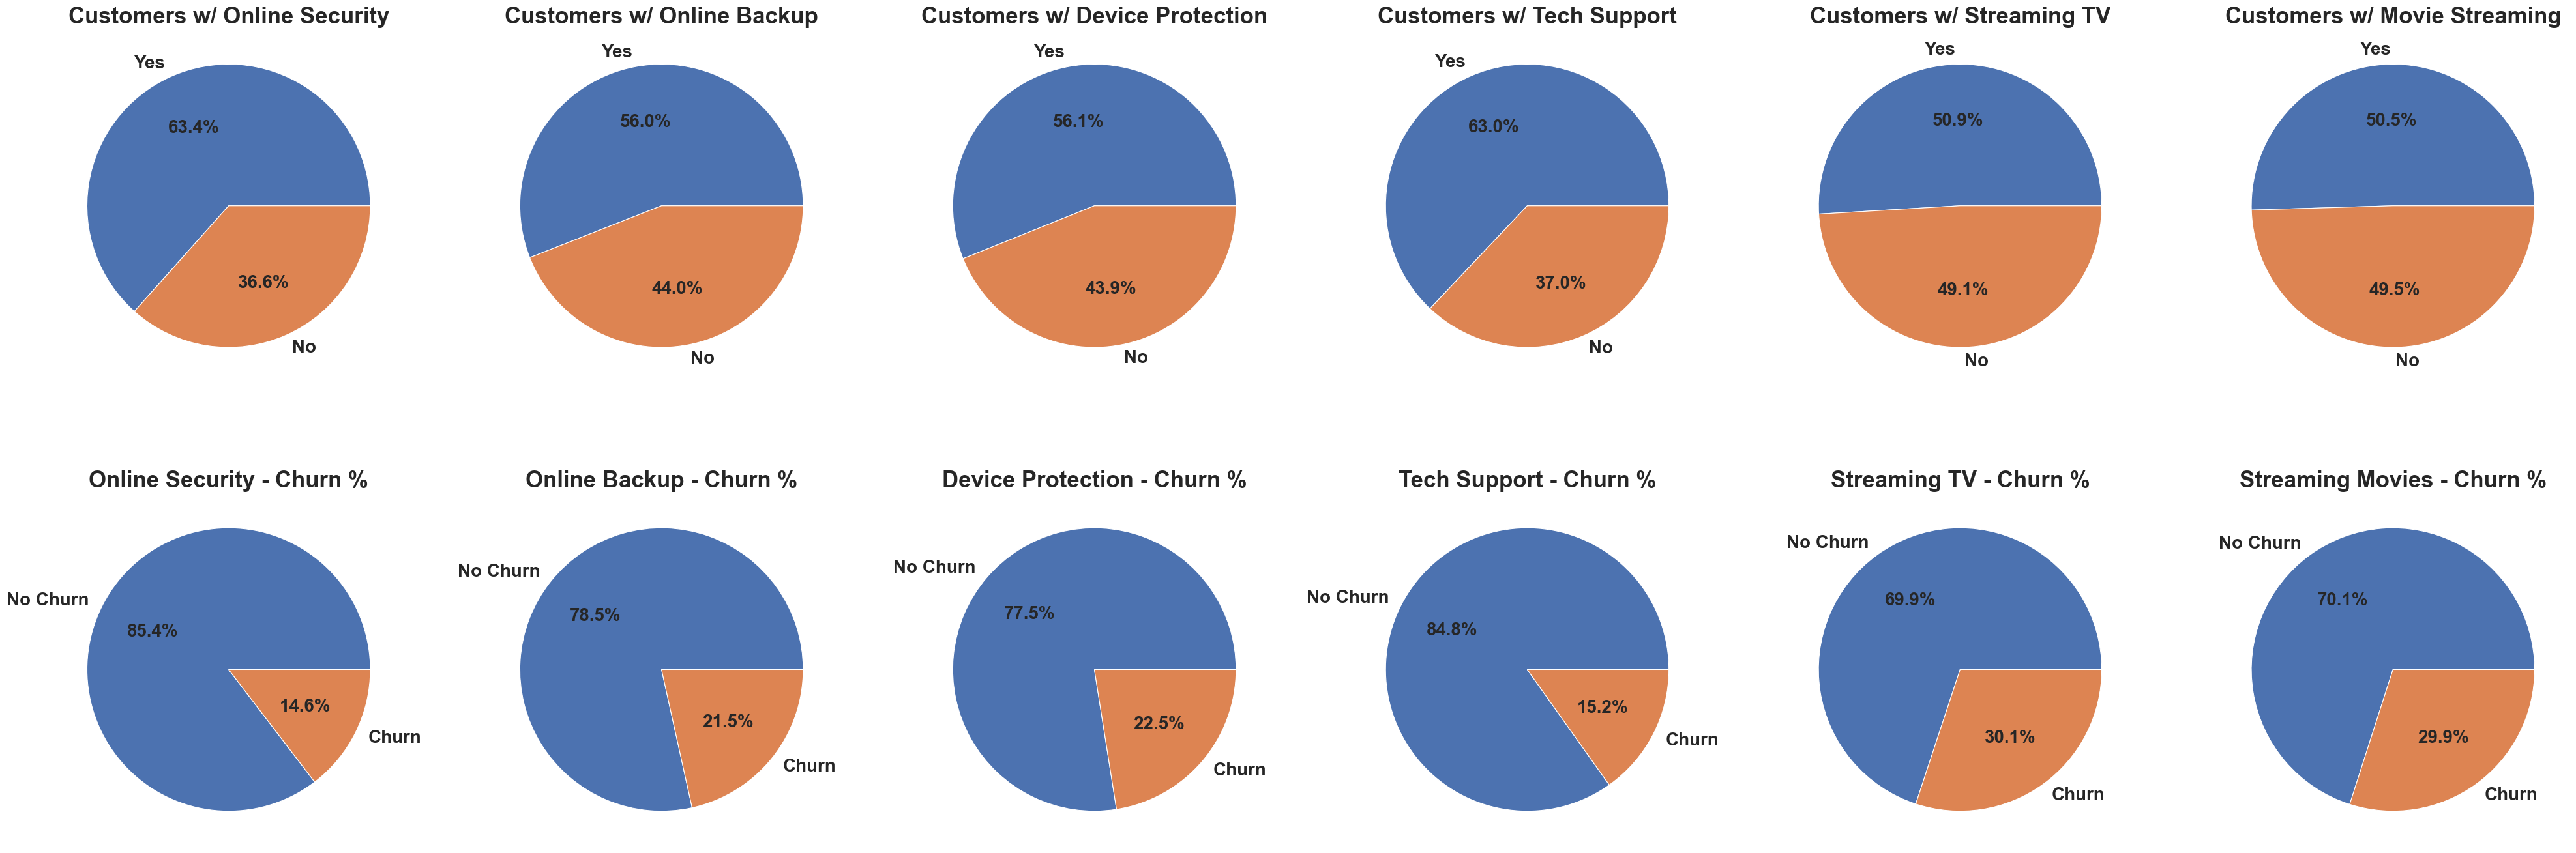

In [44]:
plot_services(df)

### Churn By Billing 


In [45]:
def plot_paperless(df):
    copy = df.copy()
    
    plt.figure(figsize=(30, 10))
    
    plt.subplot(131)
    plt.pie(copy.PaperlessBilling.value_counts(), labels=['Paperless', 'Not Paperless'], autopct='%.1f%%', textprops={'fontweight': 'bold', 'fontsize': 20})
    plt.title('Customer Paperless Billing Composition', fontweight='bold', fontsize=30)
    
    plt.subplot(132)
    churn_counts = copy.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
    churn_counts = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    churn_counts = churn_counts.stack().reset_index(name='pct_total')
    a = sns.barplot(x='PaperlessBilling', y='pct_total', hue='Churn', data=churn_counts)
    a.set_title('% Churn by Billing Type', fontsize=30, fontweight='bold')
    a.set(xticklabels=['Not Paperless', 'Paperless'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight='bold', fontsize=20)
    
    plt.subplot(133)
    b = sns.violinplot(x='PaperlessBilling', y='MonthlyCharges', hue='Churn', data=df, split=True)
    b.set_title('Violin Plot: Monthly Charges by Billing Type', fontweight='bold', fontsize=30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight='bold', fontsize=20)
    b.set(xticklabels=['Not Paperless', 'Paperless'])
    b.legend(loc='upper right')
    b.legend_.set_title('Churn', prop={'weight': 'bold', 'size': 20})
    
    plt.tight_layout()

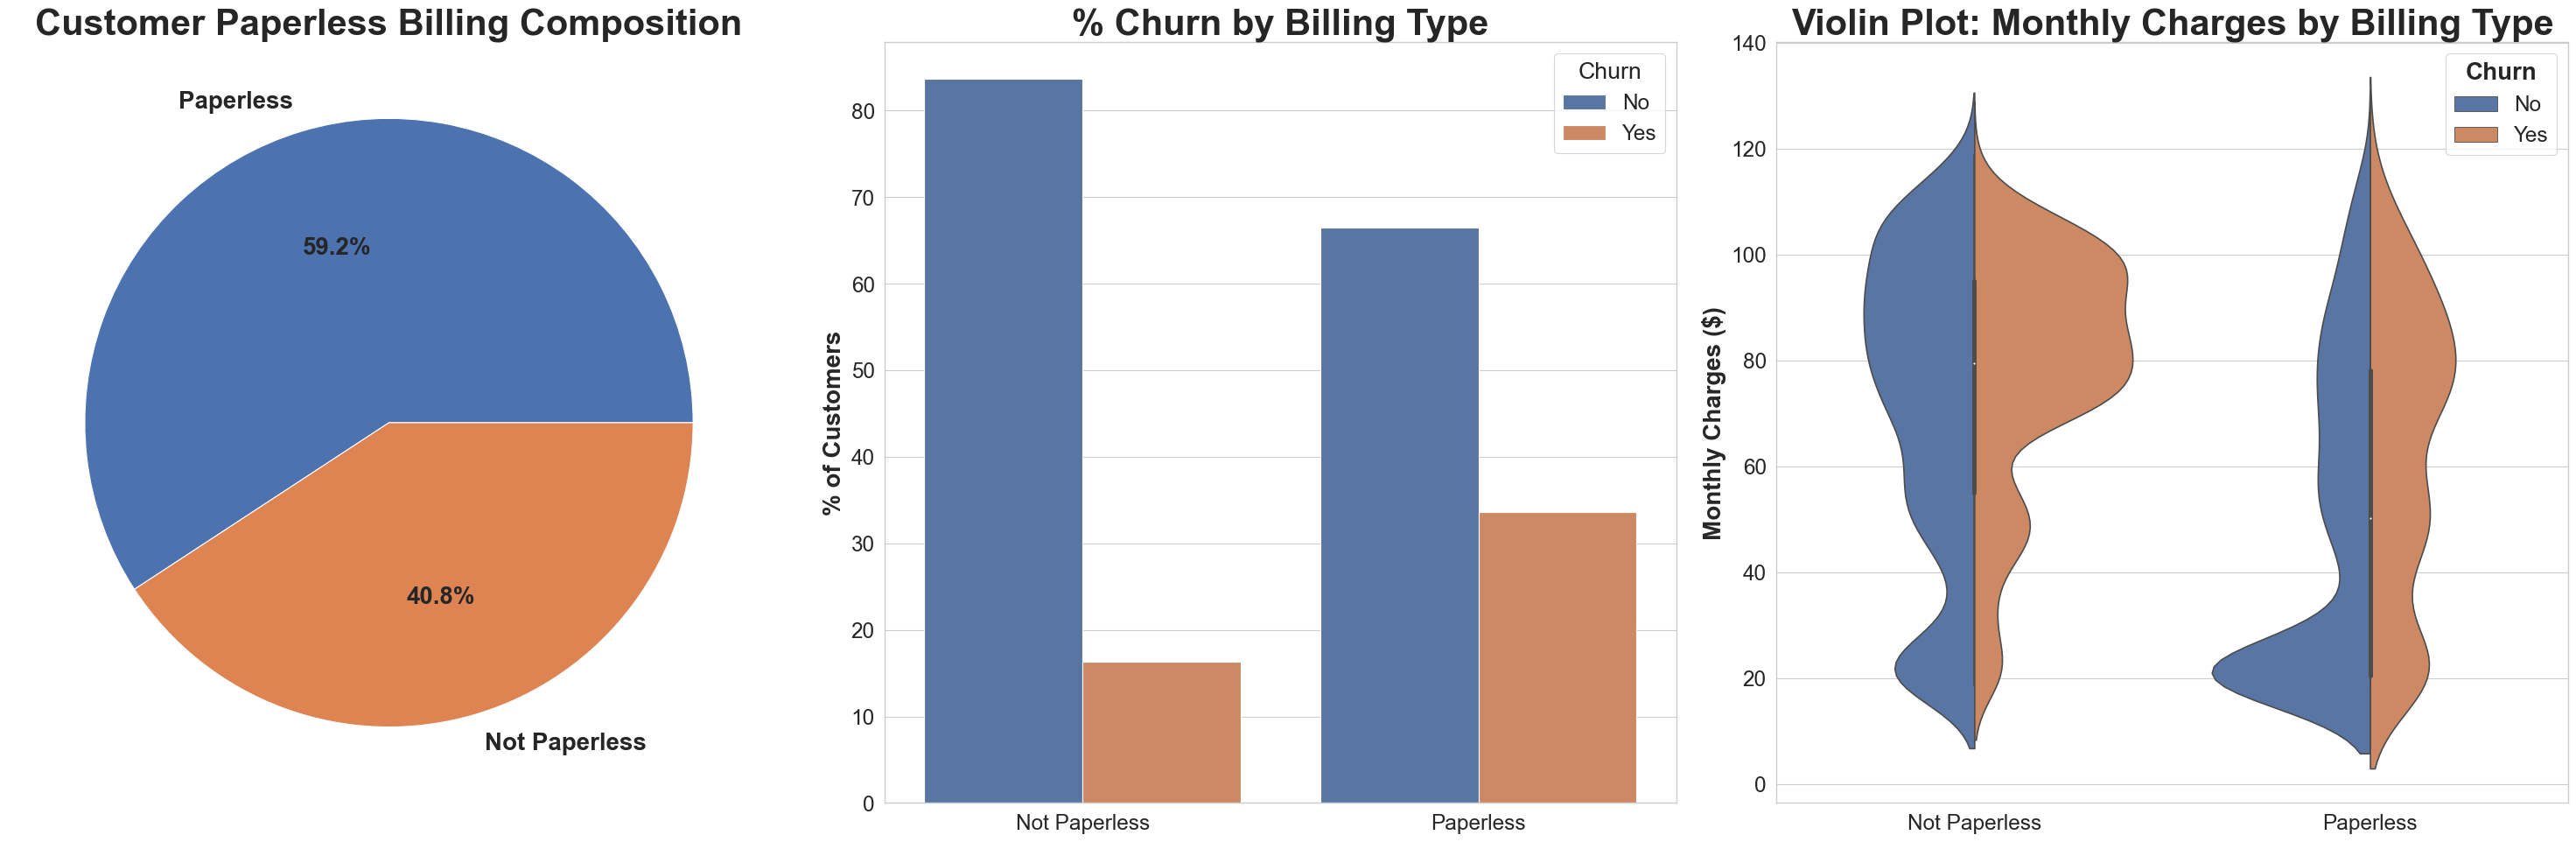

In [46]:
plot_paperless(df)

### Churn By Payment Methods


In [47]:
def plot_pay_methods(df):
    copy = df.copy()
    
    plt.figure(figsize=(30, 10))
    
    plt.subplot(131)
    payment_method_labels = df['PaymentMethod'].value_counts().index.tolist()
    plt.pie(copy.PaymentMethod.value_counts(), labels=payment_method_labels, autopct='%.1f%%', textprops={'fontsize':20, 'fontweight':'bold'}, startangle=-90)
    plt.title('Customer Payment Method Composition', fontsize=30, fontweight='bold')
    
    plt.subplot(132)
    churn_counts = copy.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
    churn_counts = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    churn_counts = churn_counts.stack().reset_index(name='pct_total')
    a = sns.barplot(x='PaymentMethod', y='pct_total', hue='Churn', data=churn_counts)
    a.set_title('% Churn - Payment Methods', fontsize=30, fontweight='bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize=20, fontweight='bold')
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
    
    plt.subplot(133)
    c = sns.violinplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=df, split=True)
    c.set_title('Violin Plot: Monthly Charges - Payment Methods', fontsize=30, fontweight='bold')
    c.set_xlabel('')
    c.set_ylabel('Monthly Charges ($)', fontweight='bold', fontsize=30)
    c.set_xticklabels(c.get_xticklabels(), rotation=45)
    
    plt.tight_layout()

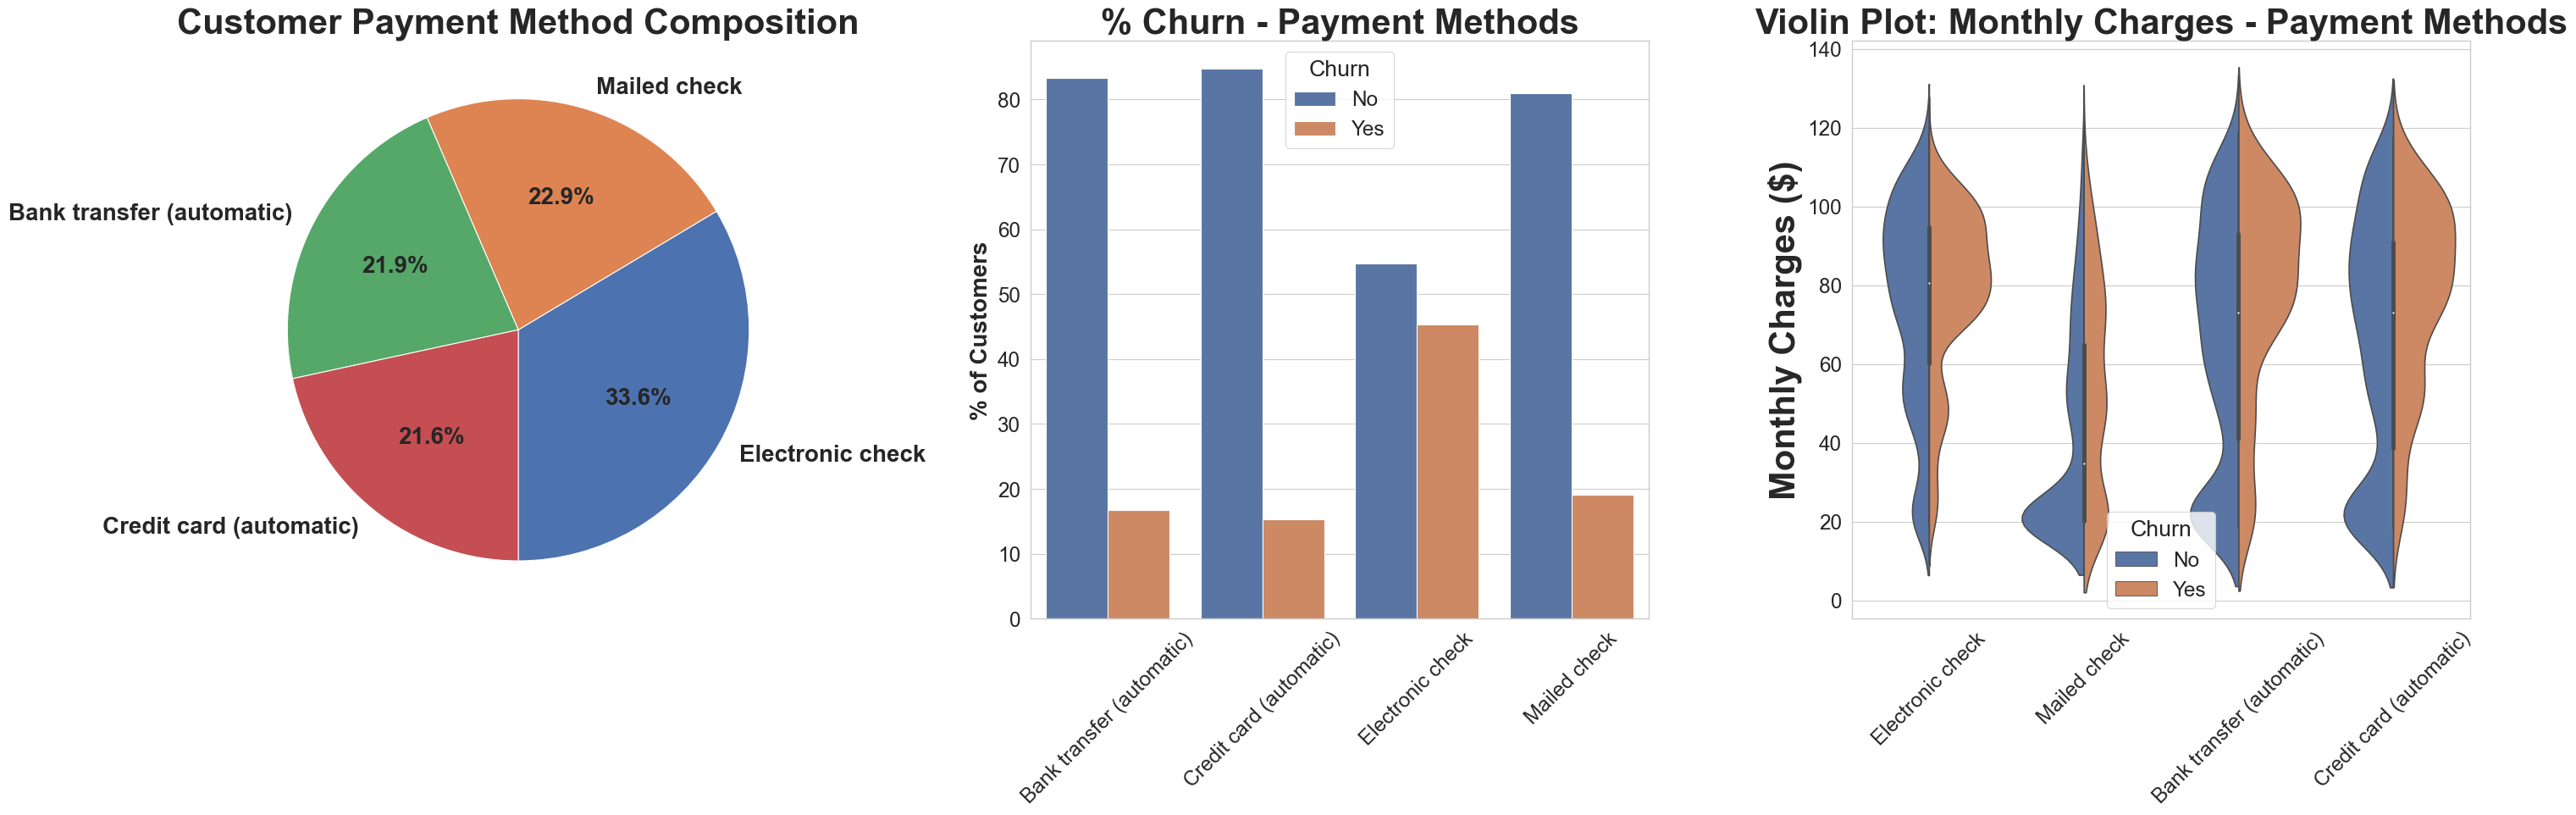

In [48]:
plot_pay_methods(df)

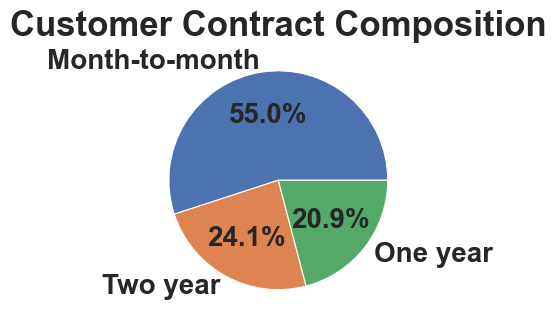

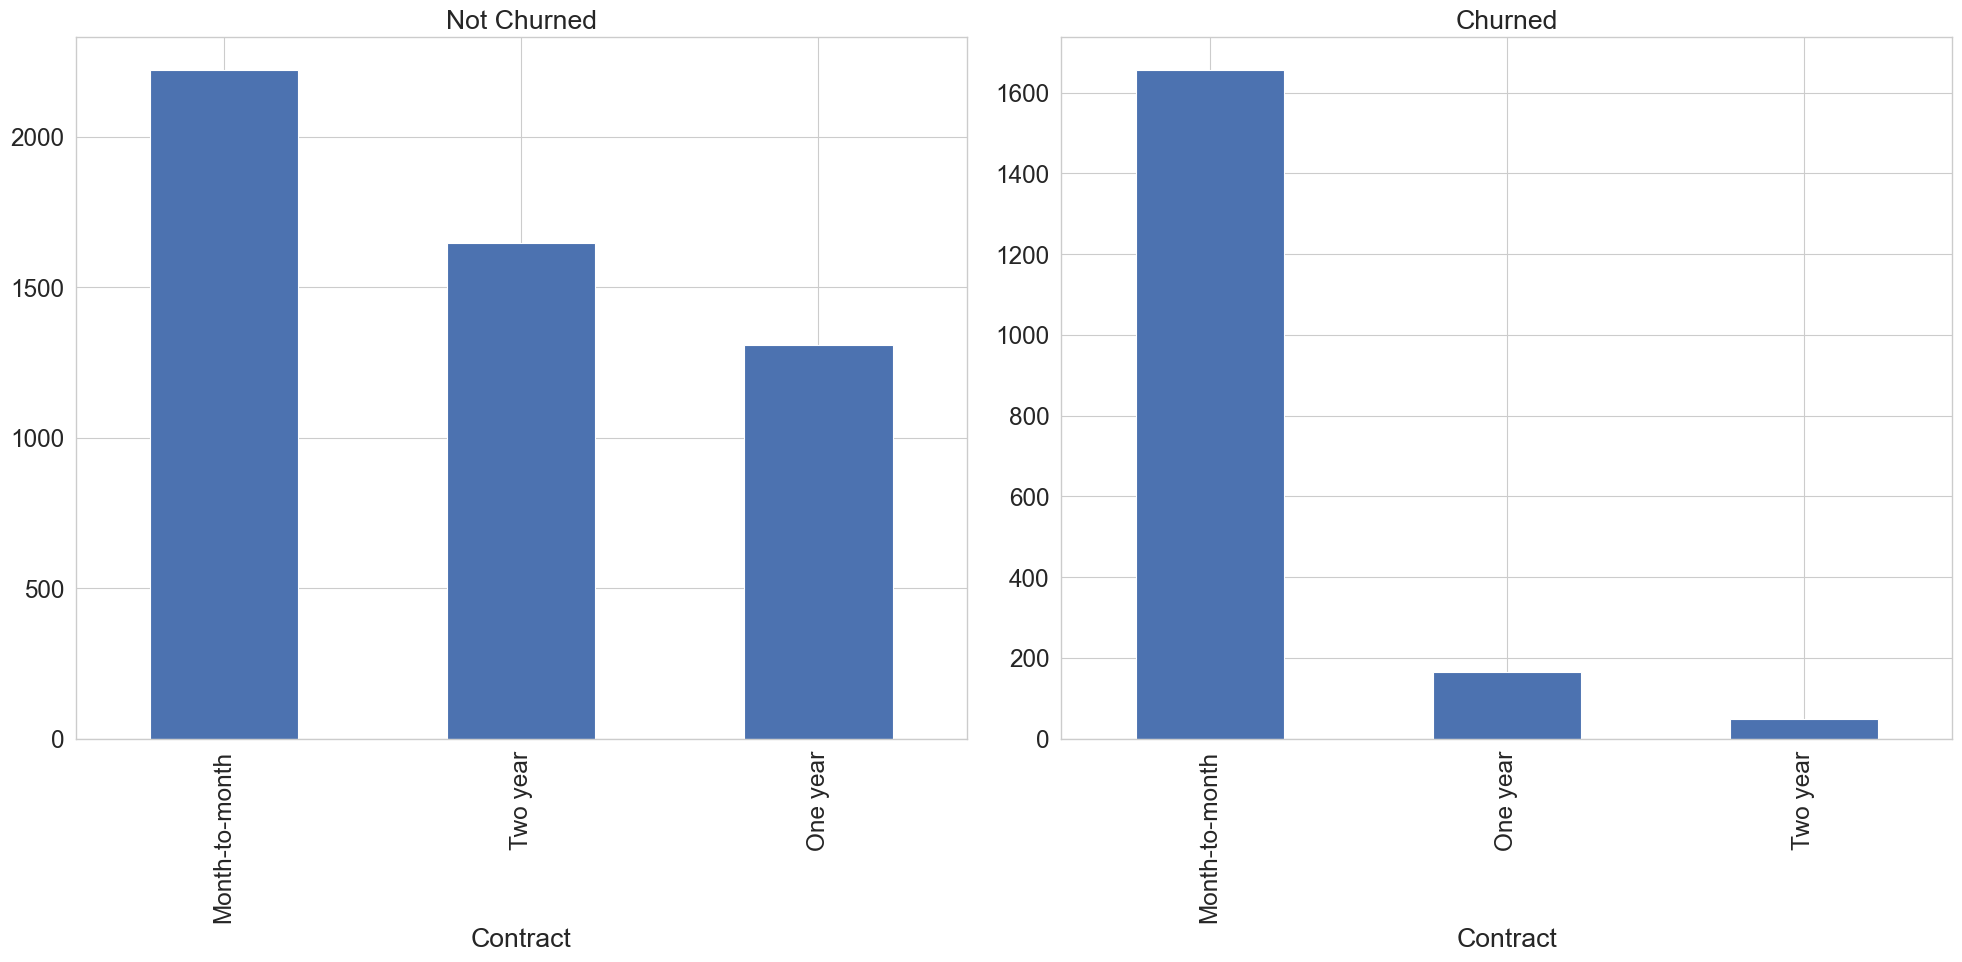

In [49]:
feature = 'Contract'
plt.figure(figsize=(12, 8))
plt.subplot(131)
contract_counts = df[feature].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%.1f%%', textprops={'fontweight': 'bold', 'fontsize': 20})
plt.title('Customer Contract Composition', fontweight='bold', fontsize=25)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('Not Churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('Churned')
plt.tight_layout()

## Target variable distribution


Text(0.5, 1.0, 'churned')

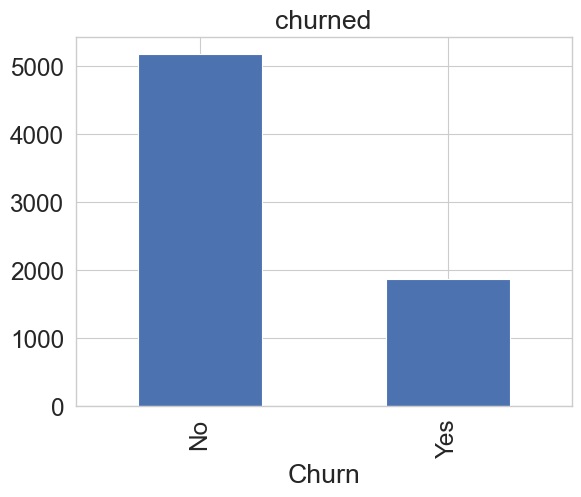

In [50]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Text(0.5, 1.0, 'Churn Outcome Pie Chart')

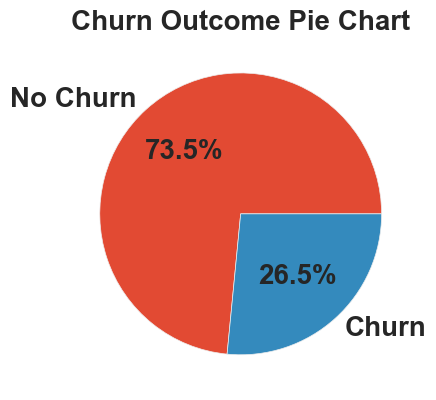

In [105]:
fig = plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.pie(df.Churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
plt.title('Churn Outcome Pie Chart', fontsize = 20, fontweight = 'bold')

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compare to churned users. The model would achieve high accuracy as it would mostly predict majority class - users who didn't churn in our example.

Few things we can do to minimize the influence of imbalanced dataset:
- resample data,
- collect more samples,
- use precision and recall as accuracy metrics.

## Outliers Analysis with IQR Method


In [52]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


## Cleaning and Transforming Data


In [53]:
df.drop(['customerID'],axis = 1,inplace = True)

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,grouped_tenure
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less_than_1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,less_than_3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less_than_1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,less_than_4
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less_than_1


#### Dropped customerID because it is not needed

### One Hot Encoding


In [55]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [56]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,grouped_tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,less_than_1,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,less_than_3,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,less_than_1,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,less_than_4,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,less_than_1,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [57]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'grouped_tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

## Rearranging Columns


In [58]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [59]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [60]:
df1.shape

(7043, 31)

In [61]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

## Feature Scaling


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

## Feature Selection


In [64]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## Prediction using Logistic Regression


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [66]:
predLR = logmodel.predict(X_test)

In [67]:
predLR

array([False, False, False, ..., False, False, False])

In [104]:
Y_test

5616    False
2937    False
1355    False
5441     True
3333    False
        ...  
2797     True
412     False
174     False
5761    False
5895    False
Name: Churn_Yes, Length: 2113, dtype: bool

In [69]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1557
        True       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



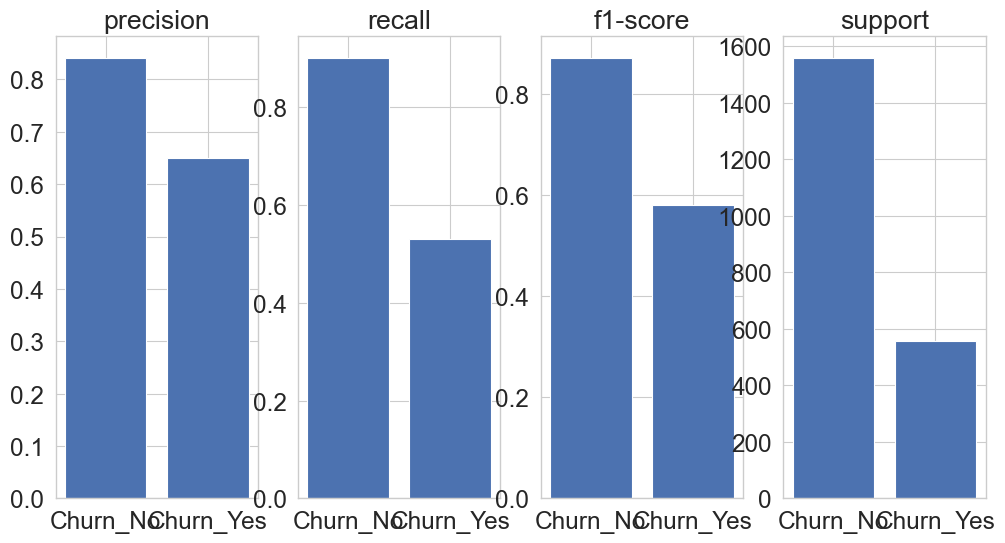

In [70]:
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])
lines = report.split('\n')
parts = [line.split() for line in lines[2:-5]]
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}
fig, ax = plt.subplots(1, 4, figsize=(12, 6))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)
plt.show()

In [71]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

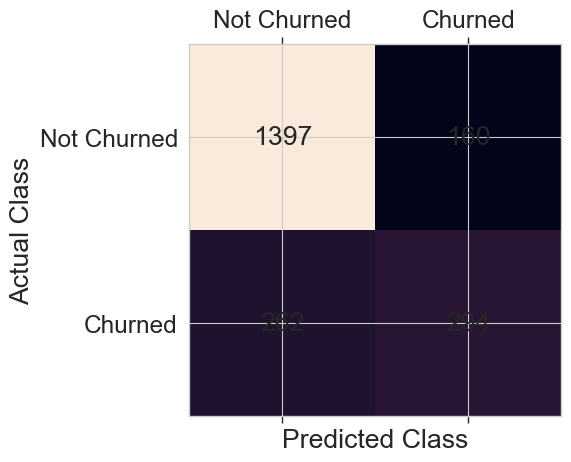

In [72]:
plt.matshow(confusion_matrix(Y_test, predLR))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [73]:
logmodel.score(X_train, Y_train)

0.8062880324543611

In [74]:
accuracy_score(Y_test, predLR)

0.8002839564600095

## Prediction using Support Vector Classifier


In [75]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [76]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1557
        True       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [77]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

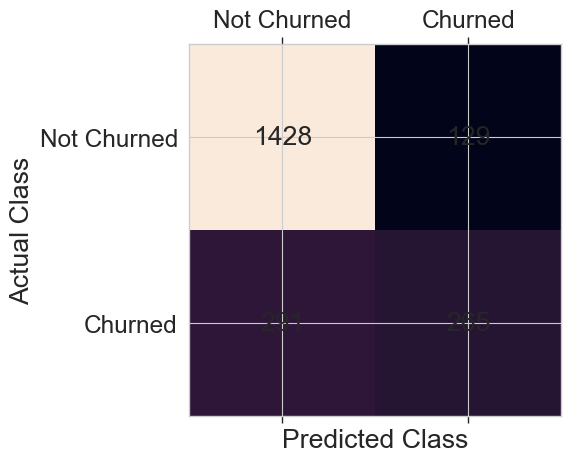

In [78]:
plt.matshow(confusion_matrix_svc)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [79]:
svc.score(X_train,Y_train)

0.8170385395537525

In [80]:
accuracy_score(Y_test, y_pred_svc)

0.8012304779933743

## Prediction using Decision Tree Classifier


In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image

import time
import warnings
warnings.filterwarnings('ignore')

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [84]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1557
        True       0.48      0.50      0.49       556

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113



In [85]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

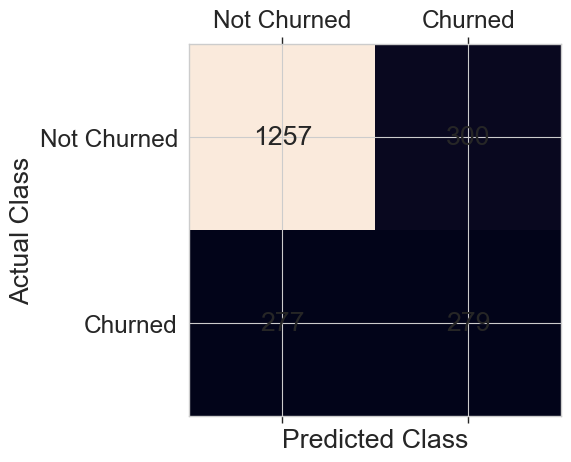

In [86]:
plt.matshow(confusion_matrix_dtc)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [87]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [88]:
accuracy_score(Y_test, y_pred_dtc)

0.7269285376242309

AUC Score: 0.6545601668953854


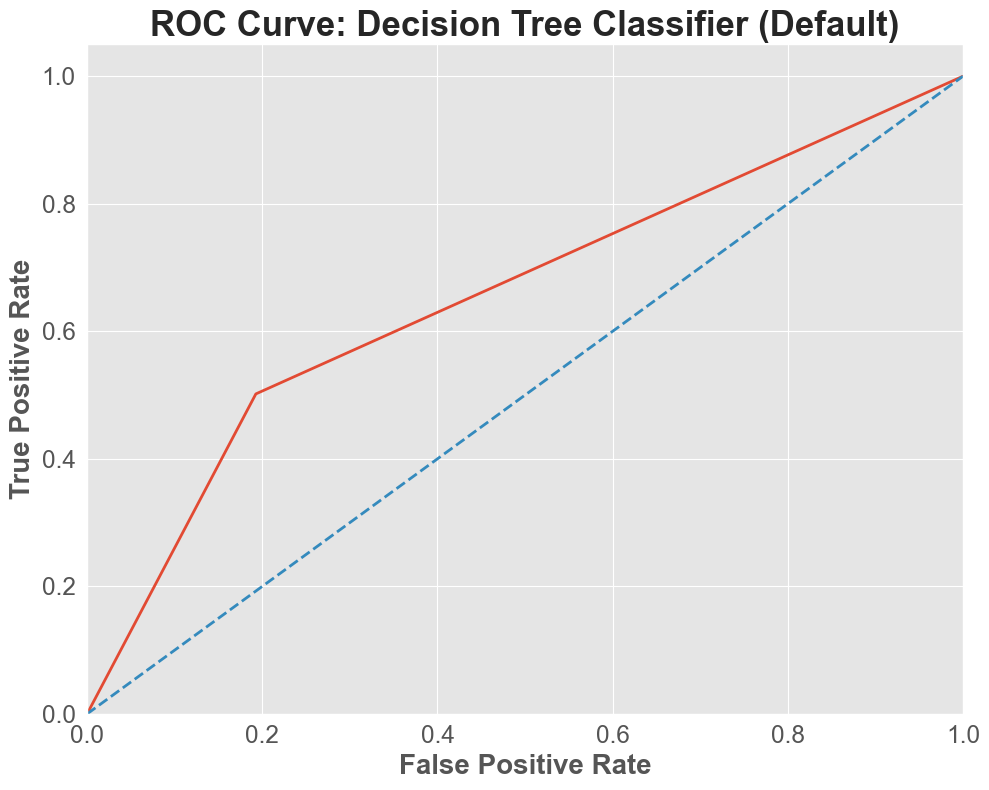

In [94]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred_dtc)

roc_auc = auc(fpr, tpr)

print(f'AUC Score: {roc_auc}')
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: Decision Tree Classifier (Default)', fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.show()

## Prediction using KNN Classifier


In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [96]:
pred_knn = knn.predict(X_test)

In [97]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

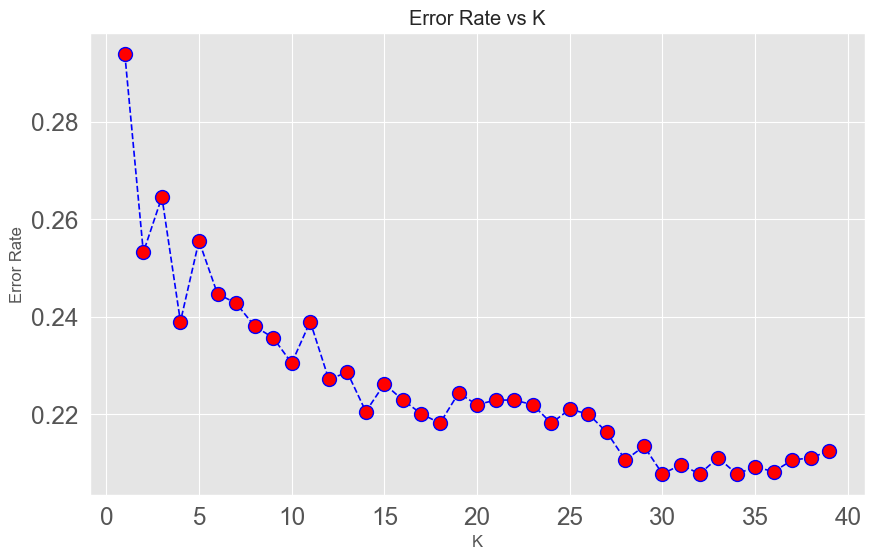

In [98]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [99]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1557
        True       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [100]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

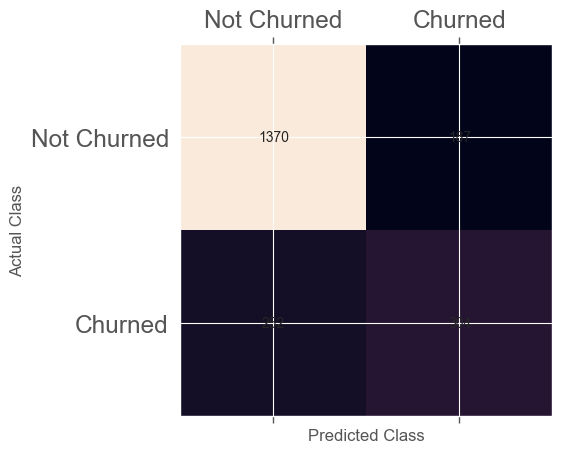

In [101]:
plt.matshow(confusion_matrix_knn)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [102]:
knn.score(X_train,Y_train)

0.8008113590263691

In [103]:
accuracy_score(Y_test, pred_knn)

0.792238523426408